<a href="https://colab.research.google.com/github/feaviolp/msc-project/blob/main/NIJ%20statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
library(haven)
library(dplyr)
library(ggplot2)

In [73]:

NIJ <- read.csv("https://raw.githubusercontent.com/feaviolp/msc-project/main/NIJ_s_Recidivism_Challenge_Full_Dataset_20240222.csv")
View(NIJ)

ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,⋯,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample
<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,M,BLACK,43-47,16,false,3,Standard,At least some college,3 or more,⋯,0.00000000,0.000000000,0.4885621,0.4476103,false,false,false,false,false,1
2,M,BLACK,33-37,16,false,6,Specialized,Less than HS diploma,1,⋯,0.00000000,0.000000000,0.4252336,2.0000000,false,true,false,false,true,1
3,M,BLACK,48 or older,24,false,7,High,At least some college,3 or more,⋯,0.16666667,0.000000000,0.0000000,0.0000000,false,true,false,true,false,1
4,M,WHITE,38-42,16,false,7,High,Less than HS diploma,1,⋯,0.00000000,0.000000000,1.0000000,0.7189961,false,false,false,false,false,1
5,M,WHITE,33-37,16,false,4,Specialized,Less than HS diploma,3 or more,⋯,0.05882353,0.000000000,0.2035623,0.9293893,false,true,true,false,false,1
6,M,WHITE,38-42,17,false,5,Standard,High School Diploma,0,⋯,0.00000000,0.000000000,0.6742520,0.3078382,false,false,false,false,false,0
7,M,BLACK,48 or older,18,false,2,Standard,Less than HS diploma,2,⋯,0.00000000,0.000000000,0.0000000,0.0000000,false,true,false,false,true,1
8,M,BLACK,38-42,16,false,5,High,High School Diploma,3 or more,⋯,0.00000000,0.000000000,0.4694464,0.5251618,false,false,false,false,false,0
9,F,BLACK,43-47,5,,7,High,High School Diploma,0,⋯,NA,NA,0.0000000,0.0000000,true,true,true,false,false,1


## Data pre-processing

Remove redundant columns from the dataframe

In [74]:
NIJ = subset(NIJ, select = -c(Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample))

Replace null values with appropriate values:

- Gang_Affiliated is missing only for Female offenders so replace with FALSE
- Supervision_Risk_Score_First is INTEGER so replace with the most frequently occuring value
- Supervision_Level_First is CATEGORICAL so replace with the most frequently occuring value
- Prison_Offense is categorical and includes "Other" so replace with "Other"
- Avg_Days_per_DrugTest is FLOAT so replace with average value
- DrugTests_THC_Positive is FLOAT but replace with 0
- DrugTests_Cocaine_Positive is FLOAT but replace with 0
- DrugTests_Meth_Positive is FLOAT but replace with 0
- DrugTests_Other_Positive is FLOAT but replace with 0
- Percent_Days_Employed is FLOAT so replace with average value
- Jobs_Per_Year is FLOAT so replace with average value

In [75]:

NIJ$Gang_Affiliated <- replace(NIJ$Gang_Affiliated, NIJ$Gang_Affiliated == '', 'false')
NIJ$Supervision_Risk_Score_First[is.na(NIJ$Supervision_Risk_Score_First)]<- names(which.max(table(NIJ$Supervision_Risk_Score_First)))
NIJ$Supervision_Level_First <- replace(NIJ$Supervision_Level_First, NIJ$Supervision_Level_First == '', names(which.max(table(NIJ$Supervision_Level_First))))
NIJ$Prison_Offense <- replace(NIJ$Prison_Offense, NIJ$Prison_Offense == '', 'Other')
NIJ$Avg_Days_per_DrugTest[is.na(NIJ$Avg_Days_per_DrugTest)]<-mean(NIJ$Avg_Days_per_DrugTest ,na.rm=TRUE)
NIJ$DrugTests_THC_Positive[is.na(NIJ$DrugTests_THC_Positive)]<-0
NIJ$DrugTests_Cocaine_Positive[is.na(NIJ$DrugTests_Cocaine_Positive)]<-0
NIJ$DrugTests_Meth_Positive[is.na(NIJ$DrugTests_Meth_Positive)]<-0
NIJ$DrugTests_Other_Positive[is.na(NIJ$DrugTests_Other_Positive)]<-0
NIJ$Percent_Days_Employed[is.na(NIJ$Percent_Days_Employed)]<-mean(NIJ$Percent_Days_Employed ,na.rm=TRUE)
NIJ$Jobs_Per_Year[is.na(NIJ$Jobs_Per_Year)]<-mean(NIJ$Jobs_Per_Year ,na.rm=TRUE)

Copy the dataframe to use for descriptive analysis later and replace M and F with Male and Female.

In [76]:
NIJ_orig <- NIJ
NIJ_orig$Gender <- replace(NIJ_orig$Gender, NIJ_orig$Gender == 'M', 'Male')
NIJ_orig$Gender <- replace(NIJ_orig$Gender, NIJ_orig$Gender == 'F', 'Female')

Some features contain integers but max out with, "x or more". To enable numerical analysis the "or more" will be removed and the column changed to integer:

- Dependents: "3 or more" changed to "3"
- Prior_Arrest_Episodes_Felony: "10 more more" changed to "10"
- Prior_Arrest_Episodes_Misd: "6 or more" changed to "6"
- Prior_Arrest_Episodes_Violent: "3 or more" changed to "3"
- Prior_Arrest_Episodes_Property: "5 or more" changed to "5"
- Prior_Arrest_Episodes_Drug: "5 or more" changed to "5"
- Prior_Arrest_Episodes_PPViolationCharges: "5 or more" changed to "5"
- Prior_Conviction_Episodes_Felony.replace: "3 or more" changed to "3"
- Prior_Conviction_Episodes_Misd.replace: "4 or more" changed to "4"
- Prior_Conviction_Episodes_Prop.replace: "3 or more" changed to "3"
- Prior_Conviction_Episodes_Drug.replace: "2 or more" changed to "2"
- Delinquency_Reports: "4 or more" changed to "4"
- Program_Attendances: "10 more more" changed to "10"
- Program_UnexcusedAbsences: "3 or more" changed to "3"
- Residence_Changes: "3 or more" changed to "3"

In [78]:
NIJ$Dependents <- replace(NIJ$Dependents, NIJ$Dependents == '3 or more', '3')
NIJ$Dependents <-  as.integer(NIJ$Dependents)

NIJ$Prior_Arrest_Episodes_Felony <- replace(NIJ$Prior_Arrest_Episodes_Felony, NIJ$Prior_Arrest_Episodes_Felony == '10 or more', '10')
NIJ$Prior_Arrest_Episodes_Felony <-  as.integer(NIJ$Prior_Arrest_Episodes_Felony)

NIJ$Prior_Arrest_Episodes_Misd <- replace(NIJ$Prior_Arrest_Episodes_Misd, NIJ$Prior_Arrest_Episodes_Misd == '6 or more', '6')
NIJ$Prior_Arrest_Episodes_Misd <-  as.integer(NIJ$Prior_Arrest_Episodes_Misd)

NIJ$Prior_Arrest_Episodes_Violent <- replace(NIJ$Prior_Arrest_Episodes_Violent, NIJ$Prior_Arrest_Episodes_Violent == '3 or more', '3')
NIJ$Prior_Arrest_Episodes_Violent <-  as.integer(NIJ$Prior_Arrest_Episodes_Violent)

NIJ$Prior_Arrest_Episodes_Property <- replace(NIJ$Prior_Arrest_Episodes_Property, NIJ$Prior_Arrest_Episodes_Property == '5 or more', '5')
NIJ$Prior_Arrest_Episodes_Property <-  as.integer(NIJ$Prior_Arrest_Episodes_Property)

NIJ$Prior_Arrest_Episodes_Drug <- replace(NIJ$Prior_Arrest_Episodes_Drug, NIJ$Prior_Arrest_Episodes_Drug == '5 or more', '5')
NIJ$Prior_Arrest_Episodes_Drug <-  as.integer(NIJ$Prior_Arrest_Episodes_Drug)

NIJ$Prior_Arrest_Episodes_PPViolationCharges <- replace(NIJ$Prior_Arrest_Episodes_PPViolationCharges, NIJ$Prior_Arrest_Episodes_PPViolationCharges == '5 or more', '5')
NIJ$Prior_Arrest_Episodes_PPViolationCharges <-  as.integer(NIJ$Prior_Arrest_Episodes_PPViolationCharges)

NIJ$Prior_Conviction_Episodes_Felony <- replace(NIJ$Prior_Conviction_Episodes_Felony, NIJ$Prior_Conviction_Episodes_Felony == '3 or more', '3')
NIJ$Prior_Conviction_Episodes_Felony <-  as.integer(NIJ$Prior_Conviction_Episodes_Felony)

NIJ$Prior_Conviction_Episodes_Misd <- replace(NIJ$Prior_Conviction_Episodes_Misd, NIJ$Prior_Conviction_Episodes_Misd == '4 or more', '4')
NIJ$Prior_Conviction_Episodes_Misd <-  as.integer(NIJ$Prior_Conviction_Episodes_Misd)

NIJ$Prior_Conviction_Episodes_Prop <- replace(NIJ$Prior_Conviction_Episodes_Prop, NIJ$Prior_Conviction_Episodes_Prop == '3 or more', '3')
NIJ$Prior_Conviction_Episodes_Prop <-  as.integer(NIJ$Prior_Conviction_Episodes_Prop)

NIJ$Prior_Conviction_Episodes_Drug <- replace(NIJ$Prior_Conviction_Episodes_Drug, NIJ$Prior_Conviction_Episodes_Drug == '2 or more', '2')
NIJ$Prior_Conviction_Episodes_Drug <-  as.integer(NIJ$Prior_Conviction_Episodes_Drug)

NIJ$Delinquency_Reports <- replace(NIJ$Delinquency_Reports, NIJ$Delinquency_Reports == '4 or more', '4')
NIJ$Delinquency_Reports <-  as.integer(NIJ$Delinquency_Reports)

NIJ$Program_Attendances <- replace(NIJ$Program_Attendances, NIJ$Program_Attendances == '10 or more', '10')
NIJ$Program_Attendances <-  as.integer(NIJ$Program_Attendances)

NIJ$Program_UnexcusedAbsences <- replace(NIJ$Program_UnexcusedAbsences, NIJ$Program_UnexcusedAbsences == '3 or more', '3')
NIJ$Program_UnexcusedAbsences <-  as.integer(NIJ$Program_UnexcusedAbsences)

NIJ$Residence_Changes <- replace(NIJ$Residence_Changes, NIJ$Residence_Changes == '3 or more', '3')
NIJ$Residence_Changes <-  as.integer(NIJ$Residence_Changes)


Age_at_Release is populated with ranges which won't be assessed as numeric, so change each value to the first number in each range and convert to integer:

In [79]:

NIJ$Age_at_Release <- replace(NIJ$Age_at_Release, NIJ$Age_at_Release == '18-22', '18')
NIJ$Age_at_Release <- replace(NIJ$Age_at_Release, NIJ$Age_at_Release == '23-27', '23')
NIJ$Age_at_Release <- replace(NIJ$Age_at_Release, NIJ$Age_at_Release == '28-32', '28')
NIJ$Age_at_Release <- replace(NIJ$Age_at_Release, NIJ$Age_at_Release == '33-37', '33')
NIJ$Age_at_Release <- replace(NIJ$Age_at_Release, NIJ$Age_at_Release == '38-42', '38')
NIJ$Age_at_Release <- replace(NIJ$Age_at_Release, NIJ$Age_at_Release == '43-47', '43')
NIJ$Age_at_Release <- replace(NIJ$Age_at_Release, NIJ$Age_at_Release == '48 or older', '48')

NIJ$Age_at_Release <-  as.integer(NIJ$Age_at_Release)

Prison_Years is populated with range descriptions so change to integer:

In [80]:
NIJ$Prison_Years <- replace(NIJ$Prison_Years, NIJ$Prison_Years == 'Less than 1 year', '0')
NIJ$Prison_Years <- replace(NIJ$Prison_Years, NIJ$Prison_Years == '1-2 years', '1')
NIJ$Prison_Years <- replace(NIJ$Prison_Years, NIJ$Prison_Years == 'Greater than 2 to 3 years', '2')
NIJ$Prison_Years <- replace(NIJ$Prison_Years, NIJ$Prison_Years == 'More than 3 years', '3')

NIJ$Prison_Years <-  as.integer(NIJ$Prison_Years)

Convert ordinal values to integers:

Supervision_Level_First
- Standard = 1
- High = 2
- Specialized = 3

Education_Level
- Less than HS diploma = 1
- High School Diploma = 2
- At least some college = 3






In [81]:
NIJ$Supervision_Level_First <- replace(NIJ$Supervision_Level_First, NIJ$Supervision_Level_First == 'Standard', '1')
NIJ$Supervision_Level_First <- replace(NIJ$Supervision_Level_First, NIJ$Supervision_Level_First == 'High', '2')
NIJ$Supervision_Level_First <- replace(NIJ$Supervision_Level_First, NIJ$Supervision_Level_First == 'Specialized', '3')

NIJ$Supervision_Level_First <-  as.integer(NIJ$Supervision_Level_First)

NIJ$Education_Level <- replace(NIJ$Education_Level, NIJ$Education_Level == 'Less than HS diploma', '1')
NIJ$Education_Level <- replace(NIJ$Education_Level, NIJ$Education_Level == 'High School Diploma', '2')
NIJ$Education_Level <- replace(NIJ$Education_Level, NIJ$Education_Level == 'At least some college', '3')

NIJ$Education_Level <-  as.integer(NIJ$Education_Level)

Convert boolean and character features to integer

In [84]:
glimpse(NIJ)

Rows: 25,835
Columns: 50
$ ID                                                <int> 1, 2, 3, 4, 5, 6, 7,…
$ Gender                                            <chr> "M", "M", "M", "M", …
$ Race                                              <chr> "BLACK", "BLACK", "B…
$ Age_at_Release                                    <int> 43, 33, 48, 38, 33, …
$ Residence_PUMA                                    <int> 16, 16, 24, 16, 16, …
$ Gang_Affiliated                                   <chr> "false", "false", "f…
$ Supervision_Risk_Score_First                      <chr> "3", "6", "7", "7", …
$ Supervision_Level_First                           <int> 1, 3, 2, 2, 3, 1, 1,…
$ Education_Level                                   <int> 3, 1, 3, 1, 1, 2, 1,…
$ Dependents                                        <int> 3, 1, 3, 1, 3, 0, 2,…
$ Prison_Offense                                    <chr> "Drug", "Violent/Non…
$ Prison_Years                                      <int> 3, 3, 1, 1, 1, 3, 0,…
$ Prior_Arrest_

In [85]:
NIJ$Gender <- as.integer(factor(NIJ$Gender))
NIJ$Race <- as.integer(factor(NIJ$Race))
NIJ$Gang_Affiliated <- as.integer(factor(NIJ$Gang_Affiliated))
NIJ$Supervision_Risk_Score_First <- as.integer(NIJ$Supervision_Risk_Score_First)
NIJ$Prison_Offense <- as.integer(factor(NIJ$Prison_Offense))
NIJ$Prior_Arrest_Episodes_DVCharges <- as.integer(factor(NIJ$Prior_Arrest_Episodes_DVCharges))
NIJ$Prior_Arrest_Episodes_GunCharges <- as.integer(factor(NIJ$Prior_Arrest_Episodes_GunCharges))
NIJ$Prior_Conviction_Episodes_Viol <- as.integer(factor(NIJ$Prior_Conviction_Episodes_Viol))
NIJ$Prior_Conviction_Episodes_PPViolationCharges <- as.integer(factor(NIJ$Prior_Conviction_Episodes_PPViolationCharges))
NIJ$Prior_Conviction_Episodes_DomesticViolenceCharges <- as.integer(factor(NIJ$Prior_Conviction_Episodes_DomesticViolenceCharges))
NIJ$Prior_Conviction_Episodes_GunCharges <- as.integer(factor(NIJ$Prior_Conviction_Episodes_GunCharges))
NIJ$Prior_Revocations_Parole  <- as.integer(factor(NIJ$Prior_Revocations_Parole ))
NIJ$Prior_Revocations_Probation <- as.integer(factor(NIJ$Prior_Revocations_Probation))
NIJ$Condition_MH_SA <- as.integer(factor(NIJ$Condition_MH_SA))
NIJ$Condition_Cog_Ed <- as.integer(factor(NIJ$Condition_Cog_Ed))
NIJ$Condition_Other <- as.integer(factor(NIJ$Condition_Other))
NIJ$Violations_ElectronicMonitoring <- as.integer(factor(NIJ$Violations_ElectronicMonitoring))
NIJ$Violations_Instruction <- as.integer(factor(NIJ$Violations_Instruction))
NIJ$Violations_FailToReport <- as.integer(factor(NIJ$Violations_FailToReport))
NIJ$Violations_MoveWithoutPermission <- as.integer(factor(NIJ$Violations_MoveWithoutPermission))
NIJ$Employment_Exempt <- as.integer(factor(NIJ$Employment_Exempt))
NIJ$Recidivism_Within_3years <- as.integer(factor(NIJ$Recidivism_Within_3years))

In [86]:
glimpse(NIJ)

Rows: 25,835
Columns: 50
$ ID                                                <int> 1, 2, 3, 4, 5, 6, 7,…
$ Gender                                            <int> 2, 2, 2, 2, 2, 2, 2,…
$ Race                                              <int> 1, 1, 1, 2, 2, 2, 1,…
$ Age_at_Release                                    <int> 43, 33, 48, 38, 33, …
$ Residence_PUMA                                    <int> 16, 16, 24, 16, 16, …
$ Gang_Affiliated                                   <int> 1, 1, 1, 1, 1, 1, 1,…
$ Supervision_Risk_Score_First                      <int> 3, 6, 7, 7, 4, 5, 2,…
$ Supervision_Level_First                           <int> 1, 3, 2, 2, 3, 1, 1,…
$ Education_Level                                   <int> 3, 1, 3, 1, 1, 2, 1,…
$ Dependents                                        <int> 3, 1, 3, 1, 3, 0, 2,…
$ Prison_Offense                                    <int> 1, 4, 1, 3, 4, 3, 2,…
$ Prison_Years                                      <int> 3, 3, 1, 1, 1, 3, 0,…
$ Prior_Arrest_

In [87]:
View(NIJ)

,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,⋯,Residence_Changes,Avg_Days_per_DrugTest,DrugTests_THC_Positive,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,1,2,1,43,16,1,3,1,3,3,⋯,2,612.00000,0.0000000,0,0.00000000,0.000000000,0.4885621,0.4476103,1,1
2,2,2,1,33,16,1,6,3,1,1,⋯,2,35.66667,0.0000000,0,0.00000000,0.000000000,0.4252336,2.0000000,1,2
3,3,2,1,48,24,1,7,2,3,3,⋯,0,93.66667,0.3333333,0,0.16666667,0.000000000,0.0000000,0.0000000,1,2
4,4,2,2,38,16,1,7,2,1,1,⋯,3,25.40000,0.0000000,0,0.00000000,0.000000000,1.0000000,0.7189961,1,1
5,5,2,2,33,16,1,4,3,1,3,⋯,0,23.11765,0.0000000,0,0.05882353,0.000000000,0.2035623,0.9293893,1,2
6,6,2,2,38,17,1,5,1,2,0,⋯,3,474.60000,0.0000000,0,0.00000000,0.000000000,0.6742520,0.3078382,1,1
7,7,2,1,48,18,1,2,1,1,2,⋯,1,238.50000,0.0000000,0,0.00000000,0.000000000,0.0000000,0.0000000,1,2
8,8,2,1,38,16,1,5,2,2,3,⋯,0,34.77500,0.0000000,0,0.00000000,0.000000000,0.4694464,0.5251618,1,1
9,9,1,1,43,5,1,7,2,2,0,⋯,0,93.89004,0.0000000,0,0.00000000,0.000000000,0.0000000,0.0000000,2,2


In order to present age plots based on Race and Gender, a new datafram is created based upon the original NIJ datafame with categorical values and the Age ranges converted to integers from the transformed dataframe.

In [92]:
RaceGenderAge <- NIJ_orig
RaceGenderAge$Age_at_Release <- NIJ$Age_at_Release

Separate the dataset into Male and Female for more detailed comparrisons later.

In [107]:
Male <- subset(NIJ, Gender == 2)
Female <- subset(NIJ, Gender == 1)

# Statistical analysis

Examine statistical differences in the data between the protected characteristics

## Is there a difference in recidivism by race?

Both Race and Recidivism_Within_3years are categorical so Chi-square test used to see if there is a difference in the level of recidivism between Black and White offenders.

In [90]:
table(as_factor(NIJ_orig$Recidivism_Within_3years), as_factor(NIJ_orig$Race))
chisq.test(table(NIJ_orig$Recidivism_Within_3years, NIJ_orig$Race))

       
        BLACK WHITE
  false  6134  4797
  true   8713  6191


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(NIJ_orig$Recidivism_Within_3years, NIJ_orig$Race)
X-squared = 14.094, df = 1, p-value = 0.0001739


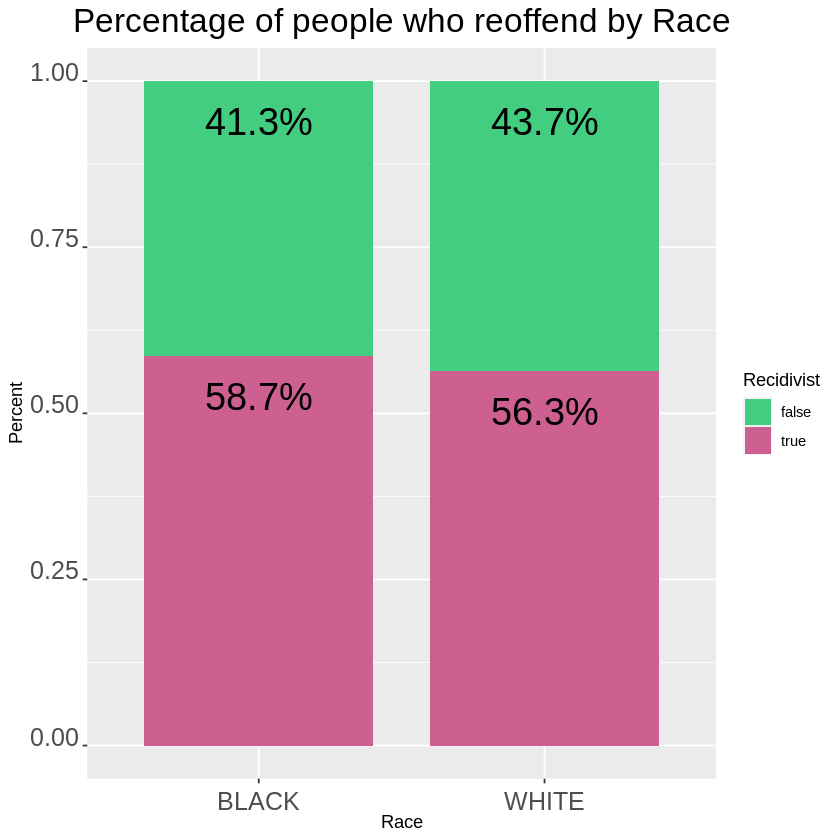

In [91]:
ggplot(NIJ_orig, aes(fill=Recidivism_Within_3years, x=Race)) +
  geom_bar(position = "fill", width=0.8) +
  labs(title='Percentage of people who reoffend by Race', x='Race', y='Percent') +
  geom_text(
    aes(label = after_stat(
      scales::percent(
        ave(count, x, FUN = function(x) x / sum(x))
      )
    )),
    stat = "count", position = "fill"
  , vjust=2, hjust=0.5, size = 8) +
  guides(fill = guide_legend(title = "Recidivist")) +
  scale_fill_manual(values = c('seagreen3', 'hotpink3')) +
  theme_grey() +
  theme(plot.title = element_text(hjust = 0.5, size = 20)) +
  theme(axis.text.x=element_text(angle=0,hjust=0.5,vjust=0, size=15)) +
  theme(axis.text.y=element_text(angle=0,hjust=0.5,vjust=0, size=15))

## Is there a difference in recidivism by Age?

First check if Age is normally distributed in total, by race, and by gender.

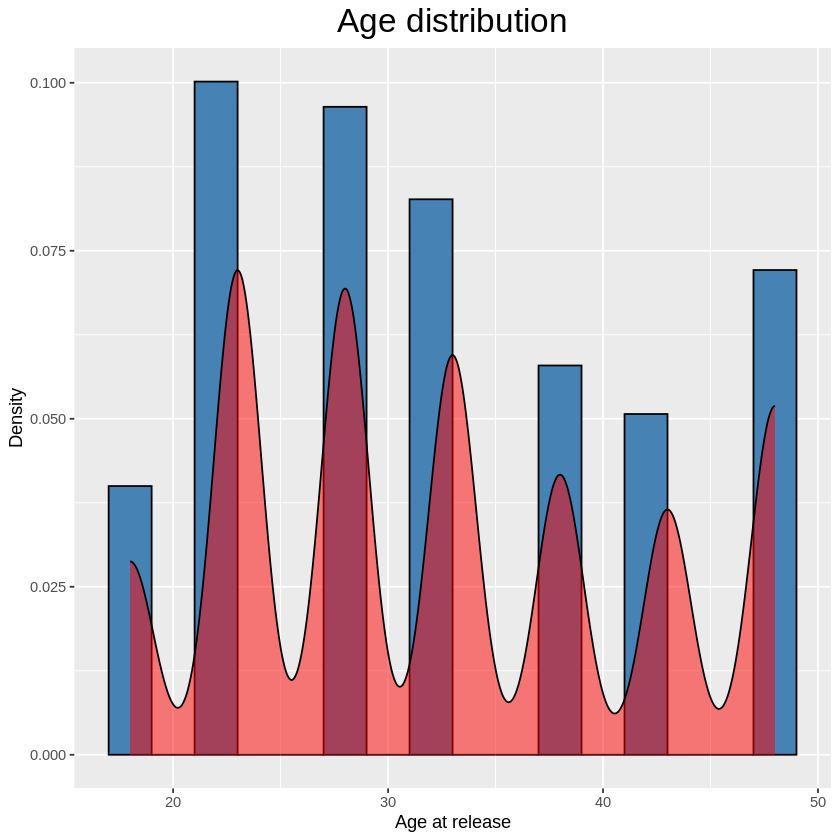

In [93]:
ggplot(RaceGenderAge, aes(x=Age_at_Release)) +
  geom_histogram(aes(y=after_stat(density)), binwidth=2,
                 colour='black', fill='steel blue') +
  geom_density(alpha=0.5, fill='red') +
  labs(title = "Age distribution", y = 'Density', x='Age at release') +
  theme_grey() +
  theme(plot.title = element_text(hjust = 0.5, size = 20))

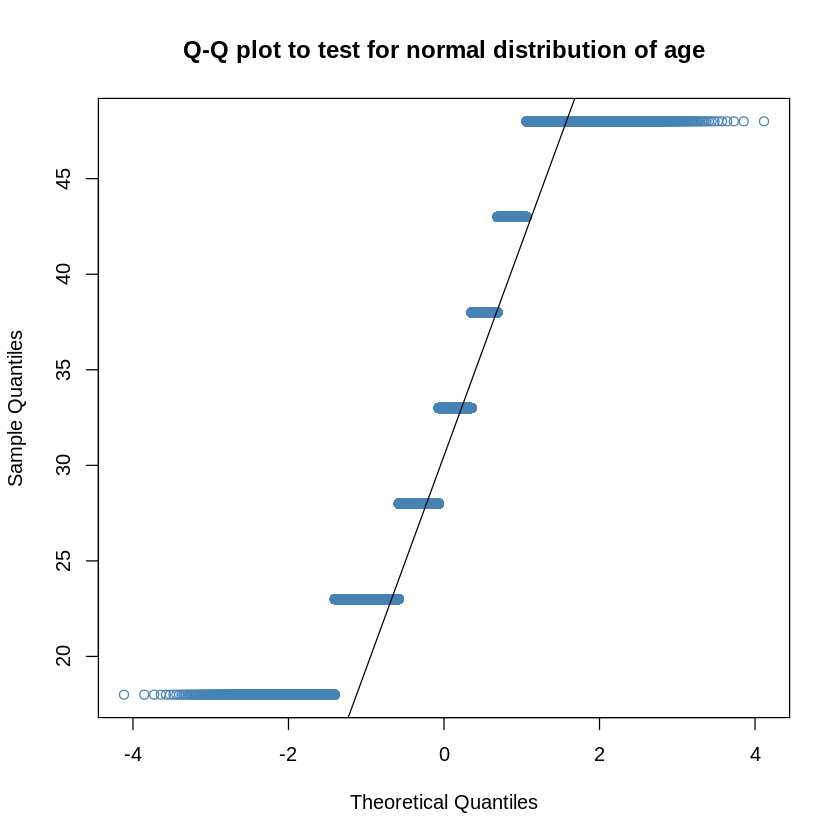

In [140]:
qqnorm(RaceGenderAge$Age_at_Release,
       col='steelblue',
       main='Q-Q plot to test for normal distribution of age')
qqline(RaceGenderAge$Age_at_Release)

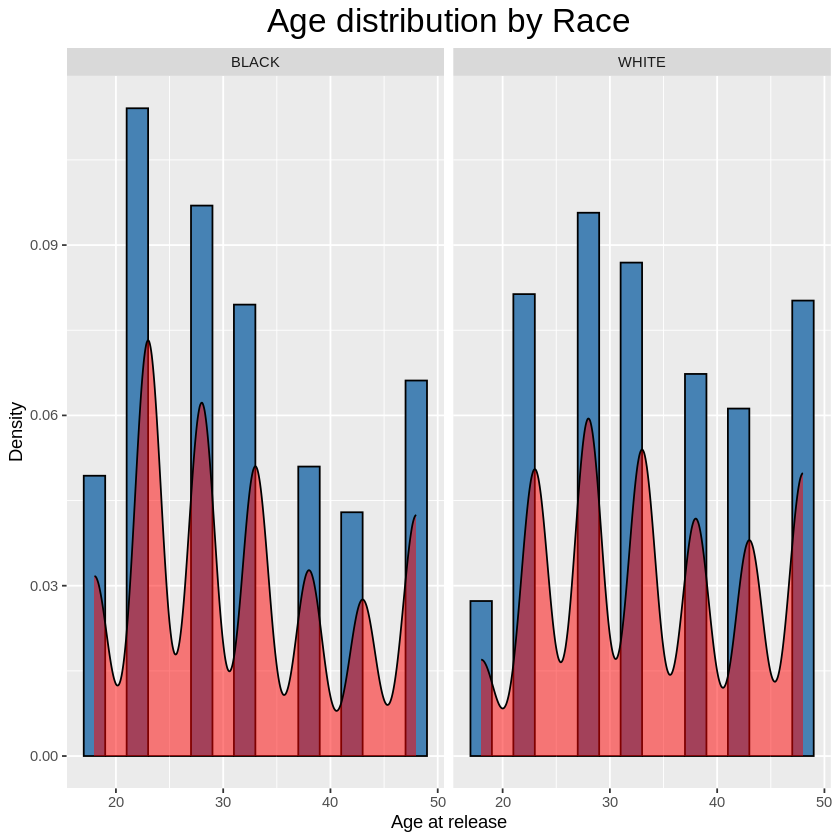

In [94]:
ggplot(RaceGenderAge, aes(x=Age_at_Release)) +
  geom_histogram(aes(y=after_stat(density)), binwidth=2,
                 colour='black', fill='steel blue') +
  geom_density(alpha=0.5, fill='red') +
  facet_grid(~as_factor(Race)) +
  labs(title = "Age distribution by Race", y = 'Density', x='Age at release') +
  theme_grey() +
  theme(plot.title = element_text(hjust = 0.5, size = 20))

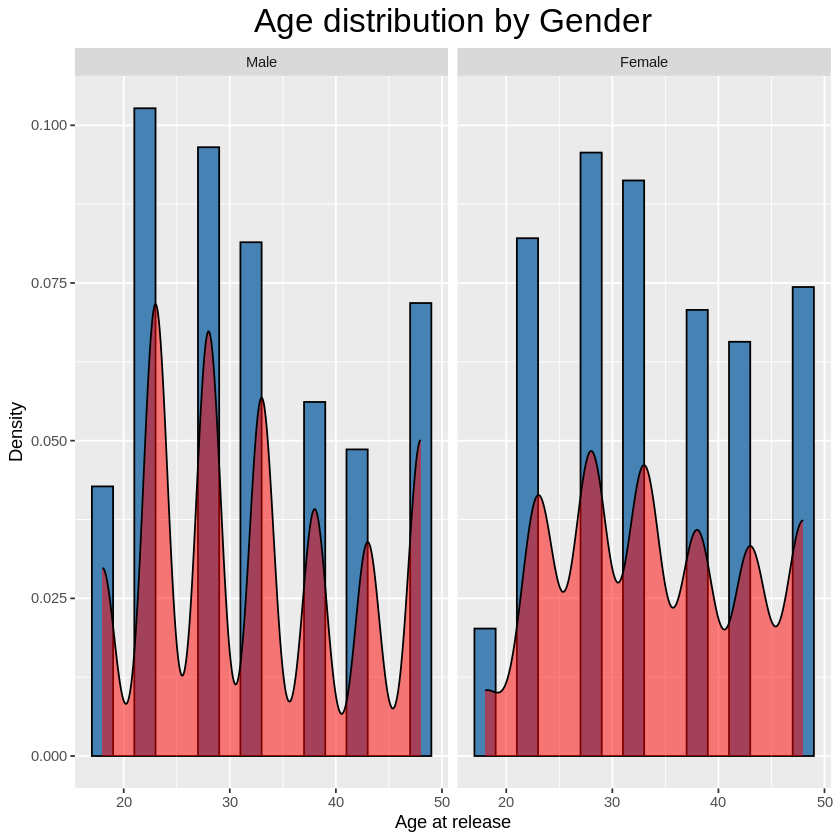

In [95]:
ggplot(RaceGenderAge, aes(x=Age_at_Release)) +
  geom_histogram(aes(y=after_stat(density)), binwidth=2,
                 colour='black', fill='steel blue') +
  geom_density(alpha=0.5, fill='red') +
  facet_grid(~as_factor(Gender)) +
  labs(title = "Age distribution by Gender", y = 'Density', x='Age at release') +
  theme_grey() +
  theme(plot.title = element_text(hjust = 0.5, size = 20))

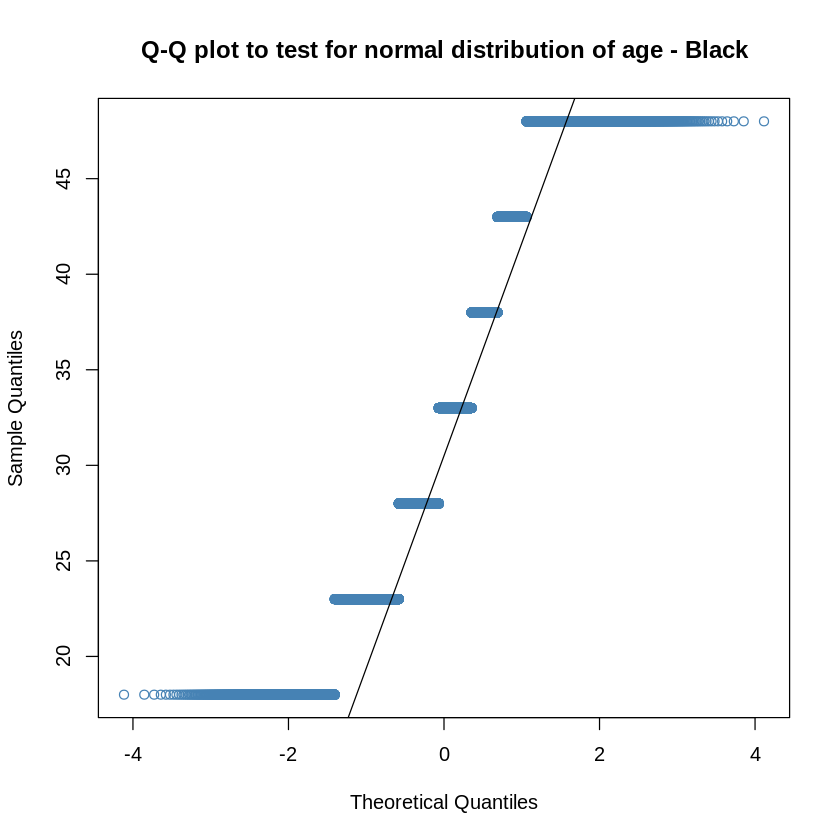

In [139]:
qqnorm(RaceGenderAge$Age_at_Release[as_factor(RaceGenderAge$Race)=='BLACK'],
       col='steelblue',
       main='Q-Q plot to test for normal distribution of age - Black')
qqline(RaceGenderAge$Age_at_Release[as_factor(RaceGenderAge$Race)=='BLACK'])

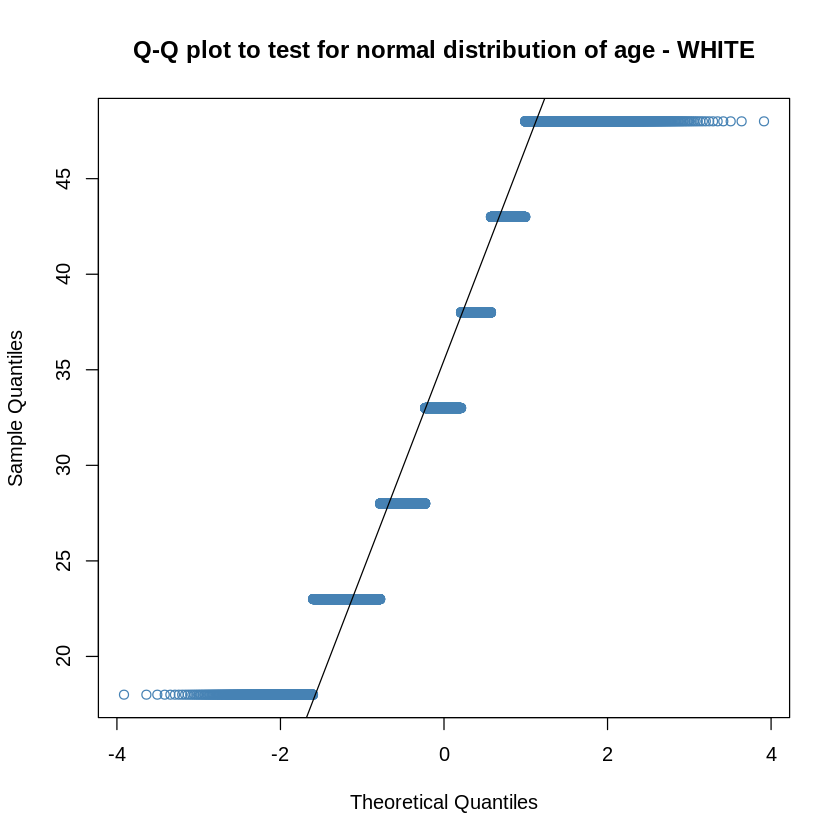

In [97]:
qqnorm(RaceGenderAge$Age_at_Release[as_factor(RaceGenderAge$Race)=='WHITE'],
       col='steelblue',
       main='Q-Q plot to test for normal distribution of age - WHITE')
qqline(RaceGenderAge$Age_at_Release[as_factor(RaceGenderAge$Race)=='WHITE'])

The distribution of Age is not normal so the non-parametric Mann-Whitney U test can be used. However, with a large sample size the central limit theorem allows the use of a t-test, so both will be checked.

In [102]:
wilcox.test(Age_at_Release ~ Recidivism_Within_3years, data=RaceGenderAge)
t.test(Age_at_Release ~ as_factor(Recidivism_Within_3years), data=RaceGenderAge)


	Wilcoxon rank sum test with continuity correction

data:  Age_at_Release by Recidivism_Within_3years
W = 98018098, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  Age_at_Release by as_factor(Recidivism_Within_3years)
t = 28.822, df = 22988, p-value < 2.2e-16
alternative hypothesis: true difference in means between group false and group true is not equal to 0
95 percent confidence interval:
 3.145913 3.605023
sample estimates:
mean in group false  mean in group true 
           34.53737            31.16190 


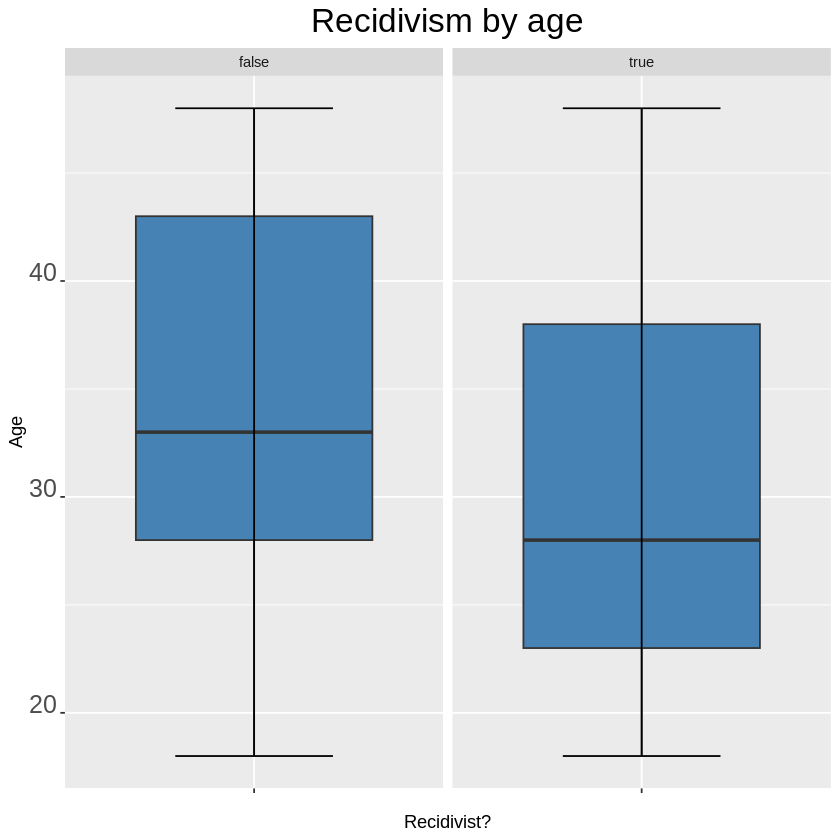

In [104]:
ggplot(RaceGenderAge, aes(x='', y=Age_at_Release)) +
  geom_boxplot(fill='steel blue') +
  stat_boxplot(geom ='errorbar', width=0.5) +
  labs(title = "Recidivism by age", y = 'Age', x='Recidivist?') +
  facet_grid(~as_factor(Recidivism_Within_3years)) +
  theme_grey() +
  theme(plot.title = element_text(hjust = 0.5, size = 20)) +
  theme(axis.text.y=element_text(angle=0,hjust=0.5,vjust=0, size=15))

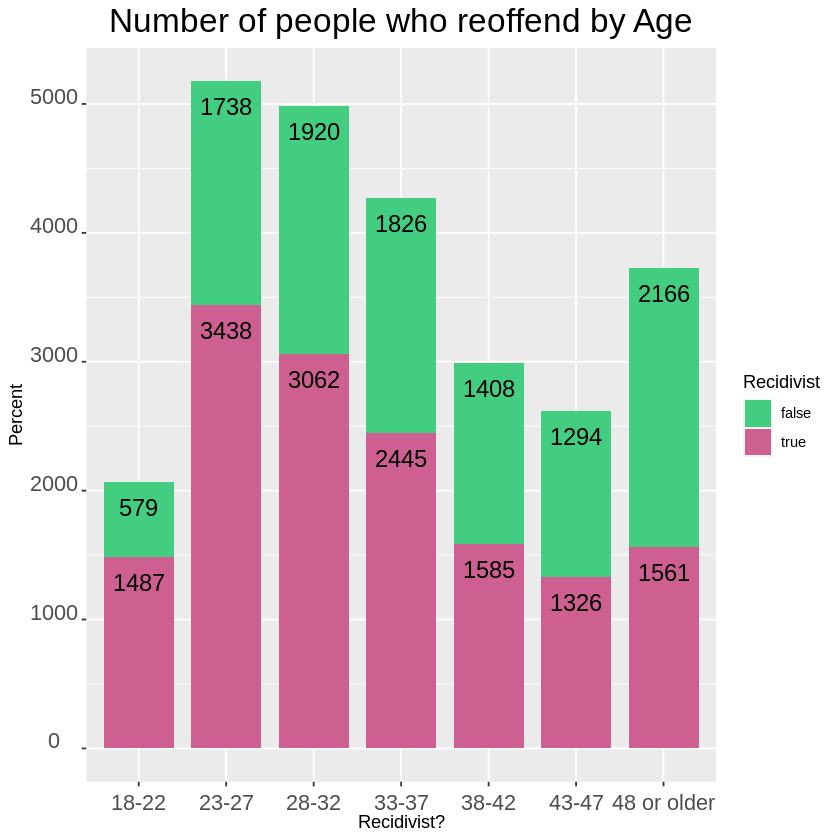

In [105]:
ggplot(NIJ_orig, aes(fill=Recidivism_Within_3years, x=Age_at_Release)) +
  geom_bar(position='stack', stat='count', width=0.8) +
  labs(title='Number of people who reoffend by Age', x='Recidivist?', y='Percent') +
  geom_text(aes(label = after_stat(count)), stat = "count", position = "stack", vjust=2, size = 5) +
  guides(fill = guide_legend(title = "Recidivist")) +
  scale_fill_manual(values = c('seagreen3', 'hotpink3')) +
  theme_grey() +
  theme(plot.title = element_text(hjust = 0.5, size = 20)) +
  theme(axis.text.x=element_text(angle=0,hjust=0.5,vjust=0, size=13)) +
  theme(axis.text.y=element_text(angle=0,hjust=0.5,vjust=0, size=13))

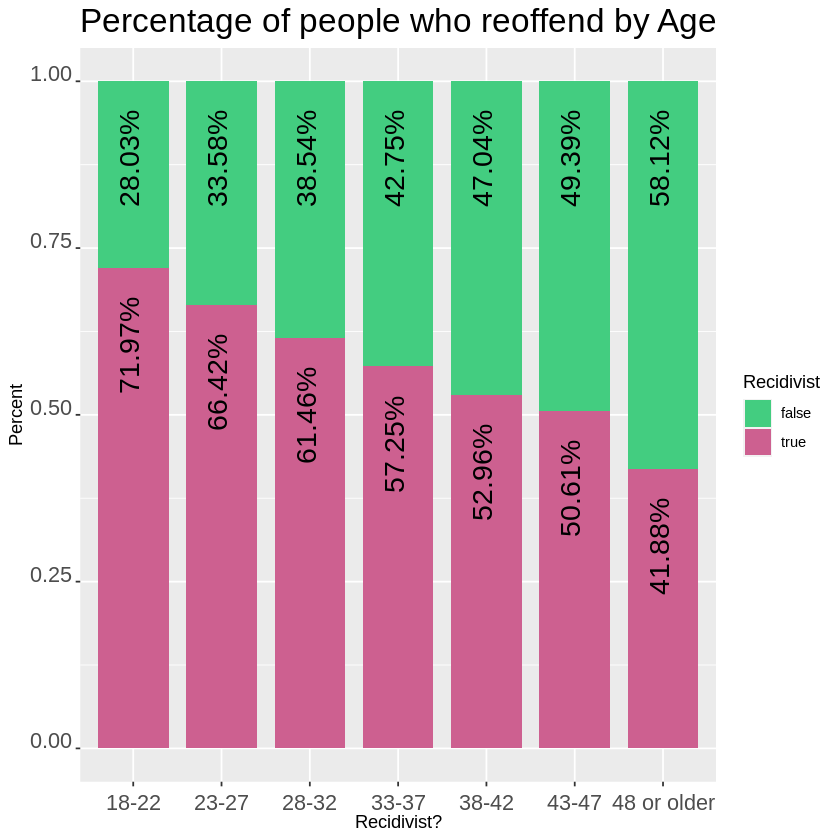

In [106]:
ggplot(NIJ_orig, aes(fill=Recidivism_Within_3years, x=Age_at_Release)) +
  geom_bar(position = "fill", width=0.8) +
  labs(title='Percentage of people who reoffend by Age', x='Recidivist?', y='Percent') +
  geom_text(
    aes(label = after_stat(
      scales::percent(
        ave(count, x, FUN = function(x) x / sum(x))
      )
    )),
    stat = "count", position = "fill"
   , vjust=0.3, hjust=1.3, angle=90, size = 6) +
   guides(fill = guide_legend(title = "Recidivist")) +
   scale_fill_manual(values = c('seagreen3', 'hotpink3')) +
   theme_grey() +
   theme(plot.title = element_text(hjust = 0.5, size = 20)) +
   theme(axis.text.x=element_text(angle=0,hjust=0.5,vjust=0, size=13)) +
   theme(axis.text.y=element_text(angle=0,hjust=0.5,vjust=0, size=13))

## Is there a difference in Age by Race?

In [98]:
wilcox.test(Age_at_Release ~ Race, data=RaceGenderAge)
t.test(Age_at_Release ~ as_factor(Race), data=RaceGenderAge)


	Wilcoxon rank sum test with continuity correction

data:  Age_at_Release by Race
W = 69826119, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  Age_at_Release by as_factor(Race)
t = -19.514, df = 24010, p-value < 2.2e-16
alternative hypothesis: true difference in means between group BLACK and group WHITE is not equal to 0
95 percent confidence interval:
 -2.509302 -2.051234
sample estimates:
mean in group BLACK mean in group WHITE 
           31.62026            33.90053 


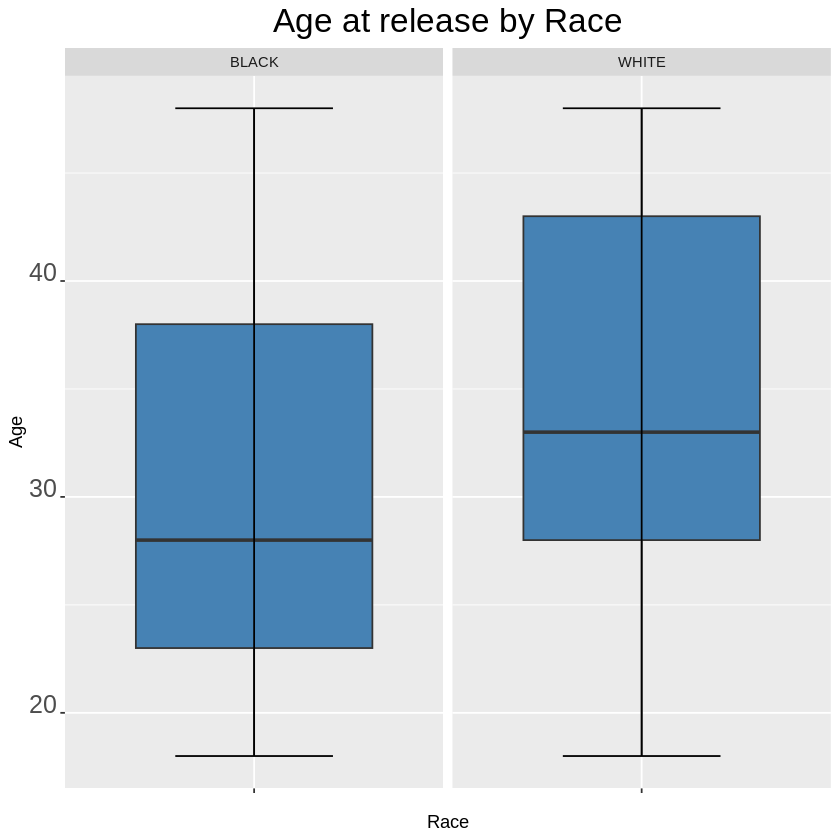

In [99]:
ggplot(RaceGenderAge, aes(x='', y=Age_at_Release)) +
  geom_boxplot(fill='steel blue') +
  stat_boxplot(geom ='errorbar', width=0.5) +
  labs(title = "Age at release by Race", y = 'Age', x='Race') +
  facet_grid(~as_factor(Race)) +
  theme_grey() +
  theme(plot.title = element_text(hjust = 0.5, size = 20)) +
  theme(axis.text.y=element_text(angle=0,hjust=0.5,vjust=0, size=15))

## Is there a difference in recidivism by gender?

Both Gender and Recidivism_Within_3years are categorical so Chi-Square is used.

In [100]:
table(as_factor(NIJ_orig$Recidivism_Within_3years), as_factor(NIJ_orig$Gender))
chisq.test(table(NIJ_orig$Recidivism_Within_3years, NIJ_orig$Gender))

       
         Male Female
  false  9206   1725
  true  13462   1442


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(NIJ_orig$Recidivism_Within_3years, NIJ_orig$Gender)
X-squared = 217.99, df = 1, p-value < 2.2e-16


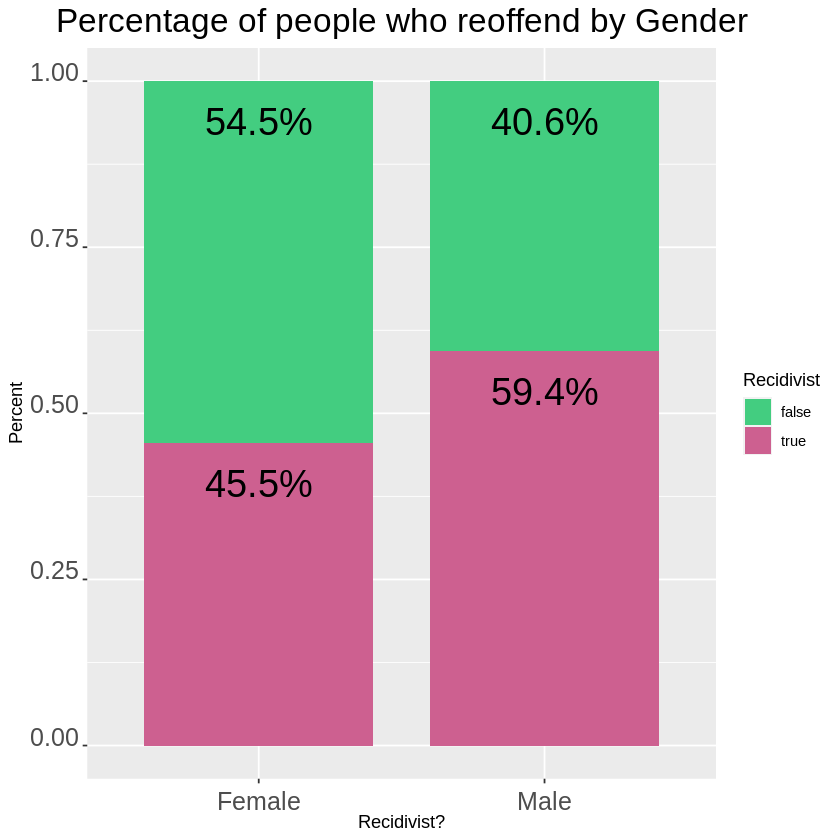

In [101]:
ggplot(NIJ_orig, aes(fill=Recidivism_Within_3years, x=Gender)) +
  geom_bar(position = "fill", width=0.8) +
  labs(title='Percentage of people who reoffend by Gender', x='Recidivist?', y='Percent') +
  geom_text(
    aes(label = after_stat(
      scales::percent(
        ave(count, x, FUN = function(x) x / sum(x))
      )
    )),
    stat = "count", position = "fill"
  , vjust=2, hjust=0.5, size = 8) +
   guides(fill = guide_legend(title = "Recidivist")) +
   scale_fill_manual(values = c('seagreen3', 'hotpink3')) +
  theme_grey() +
  theme(plot.title = element_text(hjust = 0.5, size = 20)) +
  theme(axis.text.x=element_text(angle=0,hjust=0.5,vjust=0, size=15)) +
  theme(axis.text.y=element_text(angle=0,hjust=0.5,vjust=0, size=15))

# Examine correlations

## Correlations with recidivism and race

Check features with a correlation greater than 0.1 from the EDA except Age which has already been examined.

Is there a correlation between PP Violation prior arrest episodes and recidivism and/or race for everyone, or just males, or just females?

In [192]:
wilcox.test(Prior_Arrest_Episodes_PPViolationCharges ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Prior_Arrest_Episodes_PPViolationCharges, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_PPViolationCharges by Recidivism_Within_3years
W = 60091696, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Prior_Arrest_Episodes_PPViolationCharges and NIJ$Recidivism_Within_3years
S = 2.2152e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2292122 


In [193]:
wilcox.test(Prior_Arrest_Episodes_PPViolationCharges ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Prior_Arrest_Episodes_PPViolationCharges, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_PPViolationCharges by Recidivism_Within_3years
W = 46411974, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Arrest_Episodes_PPViolationCharges and Male$Recidivism_Within_3years
S = 1.5179e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2180697 


In [195]:
wilcox.test(Prior_Arrest_Episodes_PPViolationCharges ~ Race, data=Male)
cor.test(Male$Prior_Arrest_Episodes_PPViolationCharges, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_PPViolationCharges by Race
W = 56798607, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Arrest_Episodes_PPViolationCharges and Male$Race
S = 1.8188e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.06311263 


In [194]:
wilcox.test(Prior_Arrest_Episodes_PPViolationCharges ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Prior_Arrest_Episodes_PPViolationCharges, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_PPViolationCharges by Recidivism_Within_3years
W = 815493, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Arrest_Episodes_PPViolationCharges and Female$Recidivism_Within_3years
S = 3689494796, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.3030943 


In [196]:
wilcox.test(Prior_Arrest_Episodes_PPViolationCharges ~ Race, data=Female)
cor.test(Female$Prior_Arrest_Episodes_PPViolationCharges, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_PPViolationCharges by Race
W = 1038206, p-value = 0.0001738
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Arrest_Episodes_PPViolationCharges and Female$Race
S = 4940861570, p-value = 0.0001715
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.06672466 


Is there a correlation between Felony prior arrest episodes and recidivism and/or race for everyone, or just males, or just females?

In [197]:
wilcox.test(Prior_Arrest_Episodes_Felony ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Prior_Arrest_Episodes_Felony, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Felony by Recidivism_Within_3years
W = 62707353, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Prior_Arrest_Episodes_Felony and NIJ$Recidivism_Within_3years
S = 2.3022e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1989344 


In [198]:
wilcox.test(Prior_Arrest_Episodes_Felony ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Prior_Arrest_Episodes_Felony, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Felony by Recidivism_Within_3years
W = 48507358, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Arrest_Episodes_Felony and Male$Recidivism_Within_3years
S = 1.579e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1866431 


In [199]:
wilcox.test(Prior_Arrest_Episodes_Felony ~ Race, data=Male)
cor.test(Male$Prior_Arrest_Episodes_Felony, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Felony by Race
W = 59468355, p-value = 0.0001487
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Arrest_Episodes_Felony and Male$Race
S = 1.8924e+12, p-value = 0.0001484
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.02519452 


In [200]:
wilcox.test(Prior_Arrest_Episodes_Felony ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Prior_Arrest_Episodes_Felony, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Felony by Recidivism_Within_3years
W = 869366, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Arrest_Episodes_Felony and Female$Recidivism_Within_3years
S = 3908319286, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2617607 


In [201]:
wilcox.test(Prior_Arrest_Episodes_Felony ~ Race, data=Female)
cor.test(Female$Prior_Arrest_Episodes_Felony, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Felony by Race
W = 1117905, p-value = 0.6771
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Arrest_Episodes_Felony and Female$Race
S = 5254927796, p-value = 0.6772
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
0.007400947 


Is there a correlation between Property prior arrest episodes and recidivism and/or race for everyone, or just males, or just females?

In [202]:
wilcox.test(Prior_Arrest_Episodes_Property ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Prior_Arrest_Episodes_Property, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Property by Recidivism_Within_3years
W = 64485580, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Prior_Arrest_Episodes_Property and NIJ$Recidivism_Within_3years
S = 2.351e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1819637 


In [203]:
wilcox.test(Prior_Arrest_Episodes_Property ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Prior_Arrest_Episodes_Property, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Property by Recidivism_Within_3years
W = 49017653, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Arrest_Episodes_Property and Male$Recidivism_Within_3years
S = 1.5891e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1814225 


In [204]:
wilcox.test(Prior_Arrest_Episodes_Property ~ Race, data=Male)
cor.test(Male$Prior_Arrest_Episodes_Property, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Property by Race
W = 53947021, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Arrest_Episodes_Property and Male$Race
S = 1.7408e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.103253 


In [205]:
wilcox.test(Prior_Arrest_Episodes_Property ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Prior_Arrest_Episodes_Property, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Property by Recidivism_Within_3years
W = 915387, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Arrest_Episodes_Property and Female$Recidivism_Within_3years
S = 4062578159, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2326229 


In [206]:
wilcox.test(Prior_Arrest_Episodes_Property ~ Race, data=Female)
cor.test(Female$Prior_Arrest_Episodes_Property, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Property by Race
W = 1206106, p-value = 0.001075
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Arrest_Episodes_Property and Female$Race
S = 5601793500, p-value = 0.001067
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.05811824 


Is there a correlation between Supervision risk score and recidivism and/or race for everyone, or just males, or just females?

In [207]:
wilcox.test(Supervision_Risk_Score_First ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Supervision_Risk_Score_First, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Supervision_Risk_Score_First by Recidivism_Within_3years
W = 64434499, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Supervision_Risk_Score_First and NIJ$Recidivism_Within_3years
S = 2.3561e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1801646 


In [208]:
wilcox.test(Supervision_Risk_Score_First ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Supervision_Risk_Score_First, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Supervision_Risk_Score_First by Recidivism_Within_3years
W = 48568409, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Supervision_Risk_Score_First and Male$Recidivism_Within_3years
S = 1.5816e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1852754 


In [209]:
wilcox.test(Supervision_Risk_Score_First ~ Race, data=Male)
cor.test(Male$Supervision_Risk_Score_First, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Supervision_Risk_Score_First by Race
W = 65061744, p-value = 2.211e-15
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Supervision_Risk_Score_First and Male$Race
S = 2.0435e+12, p-value = 2.119e-15
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.05266429 


In [210]:
wilcox.test(Supervision_Risk_Score_First ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Supervision_Risk_Score_First, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Supervision_Risk_Score_First by Recidivism_Within_3years
W = 1034138, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Supervision_Risk_Score_First and Female$Recidivism_Within_3years
S = 4518704309, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1464656 


In [211]:
wilcox.test(Supervision_Risk_Score_First ~ Race, data=Female)
cor.test(Female$Supervision_Risk_Score_First, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Supervision_Risk_Score_First by Race
W = 1064797, p-value = 0.009081
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Supervision_Risk_Score_First and Female$Race
S = 5048632463, p-value = 0.00906
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.0463679 


Is there a correlation between Misdemeanor prior arrest episodes and recidivism and/or race for everyone, or just males, or just females?

In [212]:
wilcox.test(Prior_Arrest_Episodes_Misd ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Prior_Arrest_Episodes_Misd, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Misd by Recidivism_Within_3years
W = 64852604, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Prior_Arrest_Episodes_Misd and NIJ$Recidivism_Within_3years
S = 2.3616e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1782683 


In [213]:
wilcox.test(Prior_Arrest_Episodes_Misd ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Prior_Arrest_Episodes_Misd, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Misd by Recidivism_Within_3years
W = 50501961, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Arrest_Episodes_Misd and Male$Recidivism_Within_3years
S = 1.6288e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1609577 


In [214]:
wilcox.test(Prior_Arrest_Episodes_Misd ~ Race, data=Male)
cor.test(Male$Prior_Arrest_Episodes_Misd, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Misd by Race
W = 54645267, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Arrest_Episodes_Misd and Male$Race
S = 1.7596e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.09360806 


In [215]:
wilcox.test(Prior_Arrest_Episodes_Misd ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Prior_Arrest_Episodes_Misd, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Misd by Recidivism_Within_3years
W = 848096, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Arrest_Episodes_Misd and Female$Recidivism_Within_3years
S = 3816603155, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2790849 


In [216]:
wilcox.test(Prior_Arrest_Episodes_Misd ~ Race, data=Female)
cor.test(Female$Prior_Arrest_Episodes_Misd, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Misd by Race
W = 1079116, p-value = 0.04167
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Arrest_Episodes_Misd and Female$Race
S = 5102467471, p-value = 0.04165
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.03619905 


Is there a correlation between Misdemeanor prior conviction episodes and recidivism and/or race for everyone, or just males, or just females?

In [217]:
wilcox.test(Prior_Conviction_Episodes_Misd ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Prior_Conviction_Episodes_Misd, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Misd by Recidivism_Within_3years
W = 65279298, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Prior_Conviction_Episodes_Misd and NIJ$Recidivism_Within_3years
S = 2.3718e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1747248 


In [218]:
wilcox.test(Prior_Conviction_Episodes_Misd ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Prior_Conviction_Episodes_Misd, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Misd by Recidivism_Within_3years
W = 50631872, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Conviction_Episodes_Misd and Male$Recidivism_Within_3years
S = 1.6309e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.159869 


In [219]:
wilcox.test(Prior_Conviction_Episodes_Misd ~ Race, data=Male)
cor.test(Male$Prior_Conviction_Episodes_Misd, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Misd by Race
W = 56344087, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Conviction_Episodes_Misd and Male$Race
S = 1.8055e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.06994302 


In [220]:
wilcox.test(Prior_Conviction_Episodes_Misd ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Prior_Conviction_Episodes_Misd, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Misd by Recidivism_Within_3years
W = 898976, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Conviction_Episodes_Misd and Female$Recidivism_Within_3years
S = 3984628403, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2473468 


In [221]:
wilcox.test(Prior_Conviction_Episodes_Misd ~ Race, data=Female)
cor.test(Female$Prior_Conviction_Episodes_Misd, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Misd by Race
W = 1074738, p-value = 0.024
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Conviction_Episodes_Misd and Female$Race
S = 5081735000, p-value = 0.02397
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.04011519 


Is there a correlation between Property prior conviction episodes and recidivism and/or race for everyone, or just males, or just females?

In [222]:
wilcox.test(Prior_Conviction_Episodes_Prop ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Prior_Conviction_Episodes_Prop, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Prop by Recidivism_Within_3years
W = 66961644, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Prior_Conviction_Episodes_Prop and NIJ$Recidivism_Within_3years
S = 2.4114e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1609443 


In [224]:
wilcox.test(Prior_Conviction_Episodes_Prop ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Prior_Conviction_Episodes_Prop, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Prop by Recidivism_Within_3years
W = 51172761, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Conviction_Episodes_Prop and Male$Recidivism_Within_3years
S = 1.6367e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1568742 


In [225]:
wilcox.test(Prior_Conviction_Episodes_Prop ~ Race, data=Male)
cor.test(Male$Prior_Conviction_Episodes_Prop, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Prop by Race
W = 54186755, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Conviction_Episodes_Prop and Male$Race
S = 1.7402e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1036055 


In [226]:
wilcox.test(Prior_Conviction_Episodes_Prop ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Prior_Conviction_Episodes_Prop, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Prop by Recidivism_Within_3years
W = 923958, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Conviction_Episodes_Prop and Female$Recidivism_Within_3years
S = 4065717970, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2320298 


In [227]:
wilcox.test(Prior_Conviction_Episodes_Prop ~ Race, data=Female)
cor.test(Female$Prior_Conviction_Episodes_Prop, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Prop by Race
W = 1224242, p-value = 3.679e-05
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Conviction_Episodes_Prop and Female$Race
S = 5682390620, p-value = 3.606e-05
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.07334216 


Is there a correlation between Education level and recidivism and/or race for everyone, or just males, or just females?

In [228]:
wilcox.test(Education_Level ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Education_Level, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Education_Level by Recidivism_Within_3years
W = 89183922, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Education_Level and NIJ$Recidivism_Within_3years
S = 3.1264e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.08785932 


In [229]:
wilcox.test(Education_Level ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Education_Level, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Education_Level by Recidivism_Within_3years
W = 67810954, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Education_Level and Male$Recidivism_Within_3years
S = 2.1105e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.08715922 


In [230]:
wilcox.test(Education_Level ~ Race, data=Male)
cor.test(Male$Education_Level, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Education_Level by Race
W = 57504234, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Education_Level and Male$Race
S = 1.8315e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.05653968 


In [231]:
wilcox.test(Education_Level ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Education_Level, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Education_Level by Recidivism_Within_3years
W = 1295912, p-value = 0.02993
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Education_Level and Female$Recidivism_Within_3years
S = 5498378072, p-value = 0.02991
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.03858418 


In [232]:
wilcox.test(Education_Level ~ Race, data=Female)
cor.test(Female$Education_Level, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Education_Level by Race
W = 1092961, p-value = 0.126
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Education_Level and Female$Race
S = 5150157751, p-value = 0.126
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.02719088 


Is there a correlation between positive TCH drugs test and recidivism and/or race for everyone, or just males, or just females?

In [233]:
wilcox.test(DrugTests_THC_Positive ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$DrugTests_THC_Positive, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  DrugTests_THC_Positive by Recidivism_Within_3years
W = 75487226, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$DrugTests_THC_Positive and NIJ$Recidivism_Within_3years
S = 2.6378e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.08214599 


In [234]:
wilcox.test(DrugTests_THC_Positive ~ Recidivism_Within_3years, data=Male)
cor.test(Male$DrugTests_THC_Positive, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  DrugTests_THC_Positive by Recidivism_Within_3years
W = 57489348, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$DrugTests_THC_Positive and Male$Recidivism_Within_3years
S = 1.7889e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.07847997 


In [235]:
wilcox.test(DrugTests_THC_Positive ~ Race, data=Male)
cor.test(Male$DrugTests_THC_Positive, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  DrugTests_THC_Positive by Race
W = 70385384, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$DrugTests_THC_Positive and Male$Race
S = 2.2531e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
-0.160628 


In [236]:
wilcox.test(DrugTests_THC_Positive ~ Recidivism_Within_3years, data=Female)
cor.test(Female$DrugTests_THC_Positive, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  DrugTests_THC_Positive by Recidivism_Within_3years
W = 1226076, p-value = 0.2244
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$DrugTests_THC_Positive and Female$Recidivism_Within_3years
S = 5179808393, p-value = 0.2245
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.02159019 


In [237]:
wilcox.test(DrugTests_THC_Positive ~ Race, data=Female)
cor.test(Female$DrugTests_THC_Positive, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  DrugTests_THC_Positive by Race
W = 1197473, p-value = 5.107e-07
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$DrugTests_THC_Positive and Female$Race
S = 5766647806, p-value = 4.876e-07
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.08925743 


Is there a correlation between mental health or substance abuse conditions and recidivism and/or race for everyone, or just males, or just females?

In [238]:
wilcox.test(Condition_MH_SA ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Condition_MH_SA, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Condition_MH_SA by Recidivism_Within_3years
W = 72554760, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Condition_MH_SA and NIJ$Recidivism_Within_3years
S = 2.5467e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1138556 


In [239]:
wilcox.test(Condition_MH_SA ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Condition_MH_SA, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Condition_MH_SA by Recidivism_Within_3years
W = 54645947, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Condition_MH_SA and Male$Recidivism_Within_3years
S = 1.7065e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1209539 


In [240]:
wilcox.test(Condition_MH_SA ~ Race, data=Male)
cor.test(Male$Condition_MH_SA, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Condition_MH_SA by Race
W = 53392083, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Condition_MH_SA and Male$Race
S = 1.687e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1309923 


In [241]:
wilcox.test(Condition_MH_SA ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Condition_MH_SA, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Condition_MH_SA by Recidivism_Within_3years
W = 1090279, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Condition_MH_SA and Female$Recidivism_Within_3years
S = 4508583709, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1483773 


In [242]:
wilcox.test(Condition_MH_SA ~ Race, data=Female)
cor.test(Female$Condition_MH_SA, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Condition_MH_SA by Race
W = 872704, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Condition_MH_SA and Female$Race
S = 3921860347, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.259203 


## Correlations with recidivism and race

Is there a correlation between Age_at_Release and recidivism and/or race for everyone, or just males, or just females?

In [243]:
wilcox.test(Age_at_Release ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Age_at_Release, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Age_at_Release by Recidivism_Within_3years
W = 98018098, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Age_at_Release and NIJ$Recidivism_Within_3years
S = 3.3805e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1762601 


In [244]:
wilcox.test(Age_at_Release ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Age_at_Release, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Age_at_Release by Recidivism_Within_3years
W = 74667771, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Age_at_Release and Male$Recidivism_Within_3years
S = 2.2843e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1766892 


In [245]:
wilcox.test(Age_at_Release ~ Race, data=Male)
cor.test(Male$Age_at_Release, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Age_at_Release by Race
W = 52608014, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Age_at_Release and Male$Race
S = 1.7059e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1212351 


In [246]:
wilcox.test(Age_at_Release ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Age_at_Release, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Age_at_Release by Recidivism_Within_3years
W = 1432521, p-value = 8.335e-14
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Age_at_Release and Female$Recidivism_Within_3years
S = 5996475425, p-value = 6.563e-14
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1326694 


In [247]:
wilcox.test(Age_at_Release ~ Race, data=Female)
cor.test(Female$Age_at_Release, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Age_at_Release by Race
W = 1029906, p-value = 4.66e-05
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Age_at_Release and Female$Race
S = 4.911e+09, p-value = 4.572e-05
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.07237061 


Is there a correlation between Residence_PUMA and recidivism and/or race for everyone, or just males, or just females?

In [248]:
wilcox.test(Residence_PUMA ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Residence_PUMA, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Residence_PUMA by Recidivism_Within_3years
W = 79078201, p-value = 5.764e-05
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Residence_PUMA and NIJ$Recidivism_Within_3years
S = 2.802e+12, p-value = 5.751e-05
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.02502519 


In [249]:
wilcox.test(Residence_PUMA ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Residence_PUMA, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Residence_PUMA by Recidivism_Within_3years
W = 60068431, p-value = 8.666e-05
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Residence_PUMA and Male$Recidivism_Within_3years
S = 1.8907e+12, p-value = 8.647e-05
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.02607135 


In [250]:
wilcox.test(Residence_PUMA ~ Race, data=Male)
cor.test(Male$Residence_PUMA, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Residence_PUMA by Race
W = 51225560, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Residence_PUMA and Male$Race
S = 1.6717e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1388776 


In [251]:
wilcox.test(Residence_PUMA ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Residence_PUMA, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Residence_PUMA by Recidivism_Within_3years
W = 1183842, p-value = 0.01928
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Residence_PUMA and Female$Recidivism_Within_3years
S = 5073939404, p-value = 0.01926
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.0415877 


In [252]:
wilcox.test(Residence_PUMA ~ Race, data=Female)
cor.test(Female$Residence_PUMA, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Residence_PUMA by Race
W = 870884, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Residence_PUMA and Female$Race
S = 4301514099, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1874905 


Is there a correlation between Gang_Affiliated and recidivism and/or race for everyone, or just males, or just females?

In [253]:
wilcox.test(Gang_Affiliated ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Gang_Affiliated, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Gang_Affiliated by Recidivism_Within_3years
W = 70514106, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Gang_Affiliated and NIJ$Recidivism_Within_3years
S = 2.3432e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1846643 


In [254]:
wilcox.test(Gang_Affiliated ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Gang_Affiliated, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Gang_Affiliated by Recidivism_Within_3years
W = 53121518, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Gang_Affiliated and Male$Recidivism_Within_3years
S = 1.5821e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1850057 


In [255]:
wilcox.test(Gang_Affiliated ~ Race, data=Male)
cor.test(Male$Gang_Affiliated, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Gang_Affiliated by Race
W = 65362780, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Gang_Affiliated and Male$Race
S = 2.1082e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.08599346 


Is there a correlation between Supervision_Risk_Score_First and recidivism and/or race for everyone, or just males, or just females?

In [257]:
wilcox.test(Supervision_Risk_Score_First ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Supervision_Risk_Score_First, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Supervision_Risk_Score_First by Recidivism_Within_3years
W = 64434499, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Supervision_Risk_Score_First and NIJ$Recidivism_Within_3years
S = 2.3561e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1801646 


In [258]:
wilcox.test(Supervision_Risk_Score_First ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Supervision_Risk_Score_First, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Supervision_Risk_Score_First by Recidivism_Within_3years
W = 48568409, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Supervision_Risk_Score_First and Male$Recidivism_Within_3years
S = 1.5816e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1852754 


In [259]:
wilcox.test(Supervision_Risk_Score_First ~ Race, data=Male)
cor.test(Male$Supervision_Risk_Score_First, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Supervision_Risk_Score_First by Race
W = 65061744, p-value = 2.211e-15
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Supervision_Risk_Score_First and Male$Race
S = 2.0435e+12, p-value = 2.119e-15
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.05266429 


In [260]:
wilcox.test(Supervision_Risk_Score_First ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Supervision_Risk_Score_First, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Supervision_Risk_Score_First by Recidivism_Within_3years
W = 1034138, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Supervision_Risk_Score_First and Female$Recidivism_Within_3years
S = 4518704309, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1464656 


In [261]:
wilcox.test(Supervision_Risk_Score_First ~ Race, data=Female)
cor.test(Female$Supervision_Risk_Score_First, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Supervision_Risk_Score_First by Race
W = 1064797, p-value = 0.009081
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Supervision_Risk_Score_First and Female$Race
S = 5048632463, p-value = 0.00906
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.0463679 


Is there a correlation between Supervision_Level_First and recidivism and/or race for everyone, or just males, or just females?

In [262]:
wilcox.test(Supervision_Level_First ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Supervision_Level_First, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Supervision_Level_First by Recidivism_Within_3years
W = 76067222, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Supervision_Level_First and NIJ$Recidivism_Within_3years
S = 2.699e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.06084827 


In [263]:
wilcox.test(Supervision_Level_First ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Supervision_Level_First, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Supervision_Level_First by Recidivism_Within_3years
W = 58355268, p-value = 1.22e-15
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Supervision_Level_First and Male$Recidivism_Within_3years
S = 1.8381e+12, p-value = 1.168e-15
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.05315242 


In [264]:
wilcox.test(Supervision_Level_First ~ Race, data=Male)
cor.test(Male$Supervision_Level_First, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Supervision_Level_First by Race
W = 62723506, p-value = 0.001243
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Supervision_Level_First and Male$Race
S = 1.9829e+12, p-value = 0.001241
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.02144681 


In [265]:
wilcox.test(Supervision_Level_First ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Supervision_Level_First, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Supervision_Level_First by Recidivism_Within_3years
W = 1153571, p-value = 0.0001114
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Supervision_Level_First and Female$Recidivism_Within_3years
S = 4930517683, p-value = 0.0001097
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.06867851 


In [266]:
wilcox.test(Supervision_Level_First ~ Race, data=Female)
cor.test(Female$Supervision_Level_First, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Supervision_Level_First by Race
W = 1147841, p-value = 0.3715
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Supervision_Level_First and Female$Race
S = 5378196639, p-value = 0.3716
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.01588321 


Is there a correlation between Education_Level and recidivism and/or race for everyone, or just males, or just females?

In [267]:
wilcox.test(Education_Level ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Education_Level, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Education_Level by Recidivism_Within_3years
W = 89183922, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Education_Level and NIJ$Recidivism_Within_3years
S = 3.1264e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.08785932 


In [268]:
wilcox.test(Education_Level ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Education_Level, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Education_Level by Recidivism_Within_3years
W = 67810954, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Education_Level and Male$Recidivism_Within_3years
S = 2.1105e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.08715922 


In [269]:
wilcox.test(Education_Level ~ Race, data=Male)
cor.test(Male$Education_Level, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Education_Level by Race
W = 57504234, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Education_Level and Male$Race
S = 1.8315e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.05653968 


In [270]:
wilcox.test(Education_Level ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Education_Level, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Education_Level by Recidivism_Within_3years
W = 1295912, p-value = 0.02993
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Education_Level and Female$Recidivism_Within_3years
S = 5498378072, p-value = 0.02991
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.03858418 


In [271]:
wilcox.test(Education_Level ~ Race, data=Female)
cor.test(Female$Education_Level, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Education_Level by Race
W = 1092961, p-value = 0.126
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Education_Level and Female$Race
S = 5150157751, p-value = 0.126
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.02719088 


Is there a correlation between Dependents and recidivism and/or race for everyone, or just males, or just females?

In [272]:
wilcox.test(Dependents ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Dependents, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Dependents by Recidivism_Within_3years
W = 84298694, p-value = 6.358e-07
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Dependents and NIJ$Recidivism_Within_3years
S = 2.963e+12, p-value = 6.324e-07
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.03098377 


In [273]:
wilcox.test(Dependents ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Dependents, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Dependents by Recidivism_Within_3years
W = 64158533, p-value = 2.519e-06
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Dependents and Male$Recidivism_Within_3years
S = 2.002e+12, p-value = 2.506e-06
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.03126164 


In [274]:
wilcox.test(Dependents ~ Race, data=Male)
cor.test(Male$Dependents, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Dependents by Race
W = 67958992, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Dependents and Male$Race
S = 2.1273e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.09582089 


In [275]:
wilcox.test(Dependents ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Dependents, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Dependents by Recidivism_Within_3years
W = 1253358, p-value = 0.6966
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Dependents and Female$Recidivism_Within_3years
S = 5330799694, p-value = 0.6966
alternative hypothesis: true rho is not equal to 0
sample estimates:
         rho 
-0.006930435 


In [276]:
wilcox.test(Dependents ~ Race, data=Female)
cor.test(Female$Dependents, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Dependents by Race
W = 1212521, p-value = 0.0003262
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Dependents and Female$Race
S = 5632225875, p-value = 0.0003226
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.06386658 


Is there a correlation between Prison_Offense and recidivism and/or race for everyone, or just males, or just females?

In [277]:
wilcox.test(Prison_Offense ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Prison_Offense, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prison_Offense by Recidivism_Within_3years
W = 83076946, p-value = 0.004727
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Prison_Offense and NIJ$Recidivism_Within_3years
S = 2.9244e+12, p-value = 0.004725
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.01757645 


In [278]:
wilcox.test(Prison_Offense ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Prison_Offense, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prison_Offense by Recidivism_Within_3years
W = 63649651, p-value = 0.0003267
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prison_Offense and Male$Recidivism_Within_3years
S = 1.9876e+12, p-value = 0.0003262
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.02386608 


In [279]:
wilcox.test(Prison_Offense ~ Race, data=Male)
cor.test(Male$Prison_Offense, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prison_Offense by Race
W = 63609402, p-value = 5.472e-07
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prison_Offense and Male$Race
S = 2.0059e+12, p-value = 5.438e-07
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.03326985 


In [280]:
wilcox.test(Prison_Offense ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Prison_Offense, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prison_Offense by Recidivism_Within_3years
W = 1280305, p-value = 0.1343
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prison_Offense and Female$Recidivism_Within_3years
S = 5.435e+09, p-value = 0.1343
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.0266105 


In [281]:
wilcox.test(Prison_Offense ~ Race, data=Female)
cor.test(Female$Prison_Offense, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prison_Offense by Race
W = 1468656, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prison_Offense and Female$Race
S = 6671785940, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.2602282 


Is there a correlation between Prison_Years episodes and recidivism and/or race for everyone, or just males, or just females?

In [282]:
wilcox.test(Prison_Years ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Prison_Years, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prison_Years by Recidivism_Within_3years
W = 93350168, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Prison_Years and NIJ$Recidivism_Within_3years
S = 3.2472e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1298835 


In [283]:
wilcox.test(Prison_Years ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Prison_Years, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prison_Years by Recidivism_Within_3years
W = 71377101, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prison_Years and Male$Recidivism_Within_3years
S = 2.2016e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1341215 


In [284]:
wilcox.test(Prison_Years ~ Race, data=Male)
cor.test(Male$Prison_Years, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prison_Years by Race
W = 65906564, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prison_Years and Male$Race
S = 2.0701e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.06637585 


In [285]:
wilcox.test(Prison_Years ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Prison_Years, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prison_Years by Recidivism_Within_3years
W = 1496864, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prison_Years and Female$Recidivism_Within_3years
S = 6278922029, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1860205 


In [286]:
wilcox.test(Prison_Years ~ Race, data=Female)
cor.test(Female$Prison_Years, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prison_Years by Race
W = 1269646, p-value = 7.72e-10
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prison_Years and Female$Race
S = 5872811843, p-value = 6.932e-10
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1093107 


Is there a correlation between Prior_Arrest_Episodes_Felony and recidivism and/or race for everyone, or just males, or just females?

In [287]:
wilcox.test(Prior_Arrest_Episodes_Felony ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Prior_Arrest_Episodes_Felony, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Felony by Recidivism_Within_3years
W = 62707353, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Prior_Arrest_Episodes_Felony and NIJ$Recidivism_Within_3years
S = 2.3022e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1989344 


In [288]:
wilcox.test(Prior_Arrest_Episodes_Felony ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Prior_Arrest_Episodes_Felony, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Felony by Recidivism_Within_3years
W = 48507358, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Arrest_Episodes_Felony and Male$Recidivism_Within_3years
S = 1.579e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1866431 


In [289]:
wilcox.test(Prior_Arrest_Episodes_Felony ~ Race, data=Male)
cor.test(Male$Prior_Arrest_Episodes_Felony, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Felony by Race
W = 59468355, p-value = 0.0001487
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Arrest_Episodes_Felony and Male$Race
S = 1.8924e+12, p-value = 0.0001484
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.02519452 


In [290]:
wilcox.test(Prior_Arrest_Episodes_Felony ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Prior_Arrest_Episodes_Felony, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Felony by Recidivism_Within_3years
W = 869366, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Arrest_Episodes_Felony and Female$Recidivism_Within_3years
S = 3908319286, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2617607 


In [291]:
wilcox.test(Prior_Arrest_Episodes_Felony ~ Race, data=Female)
cor.test(Female$Prior_Arrest_Episodes_Felony, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Felony by Race
W = 1117905, p-value = 0.6771
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Arrest_Episodes_Felony and Female$Race
S = 5254927796, p-value = 0.6772
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
0.007400947 


Is there a correlation between Prior_Arrest_Episodes_Misd and recidivism and/or race for everyone, or just males, or just females?

In [292]:
wilcox.test(Prior_Arrest_Episodes_Misd ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Prior_Arrest_Episodes_Misd, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Misd by Recidivism_Within_3years
W = 64852604, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Prior_Arrest_Episodes_Misd and NIJ$Recidivism_Within_3years
S = 2.3616e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1782683 


In [293]:
wilcox.test(Prior_Arrest_Episodes_Misd ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Prior_Arrest_Episodes_Misd, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Misd by Recidivism_Within_3years
W = 50501961, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Arrest_Episodes_Misd and Male$Recidivism_Within_3years
S = 1.6288e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1609577 


In [294]:
wilcox.test(Prior_Arrest_Episodes_Misd ~ Race, data=Male)
cor.test(Male$Prior_Arrest_Episodes_Misd, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Misd by Race
W = 54645267, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Arrest_Episodes_Misd and Male$Race
S = 1.7596e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.09360806 


In [295]:
wilcox.test(Prior_Arrest_Episodes_Misd ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Prior_Arrest_Episodes_Misd, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Misd by Recidivism_Within_3years
W = 848096, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Arrest_Episodes_Misd and Female$Recidivism_Within_3years
S = 3816603155, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2790849 


In [296]:
wilcox.test(Prior_Arrest_Episodes_Misd ~ Race, data=Female)
cor.test(Female$Prior_Arrest_Episodes_Misd, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Misd by Race
W = 1079116, p-value = 0.04167
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Arrest_Episodes_Misd and Female$Race
S = 5102467471, p-value = 0.04165
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.03619905 


Is there a correlation between Prior_Arrest_Episodes_Violent and recidivism and/or race for everyone, or just males, or just females?

In [297]:
wilcox.test(Prior_Arrest_Episodes_Violent ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Prior_Arrest_Episodes_Violent, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Violent by Recidivism_Within_3years
W = 75588806, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Prior_Arrest_Episodes_Violent and NIJ$Recidivism_Within_3years
S = 2.6864e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.06523665 


In [298]:
wilcox.test(Prior_Arrest_Episodes_Violent ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Prior_Arrest_Episodes_Violent, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Violent by Recidivism_Within_3years
W = 58131862, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Arrest_Episodes_Violent and Male$Recidivism_Within_3years
S = 1.8338e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.05537433 


In [299]:
wilcox.test(Prior_Arrest_Episodes_Violent ~ Race, data=Male)
cor.test(Male$Prior_Arrest_Episodes_Violent, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Violent by Race
W = 68920160, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Arrest_Episodes_Violent and Male$Race
S = 2.1569e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1110488 


In [300]:
wilcox.test(Prior_Arrest_Episodes_Violent ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Prior_Arrest_Episodes_Violent, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Violent by Recidivism_Within_3years
W = 1198582, p-value = 0.04395
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Arrest_Episodes_Violent and Female$Recidivism_Within_3years
S = 5104560413, p-value = 0.04393
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.03580372 


In [301]:
wilcox.test(Prior_Arrest_Episodes_Violent ~ Race, data=Female)
cor.test(Female$Prior_Arrest_Episodes_Violent, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Violent by Race
W = 1383962, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Arrest_Episodes_Violent and Female$Race
S = 6422727039, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.2131837 


Is there a correlation between Prior_Arrest_Episodes_Property and recidivism and/or race for everyone, or just males, or just females?

In [302]:
wilcox.test(Prior_Arrest_Episodes_Property ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Prior_Arrest_Episodes_Property, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Property by Recidivism_Within_3years
W = 64485580, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Prior_Arrest_Episodes_Property and NIJ$Recidivism_Within_3years
S = 2.351e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1819637 


In [303]:
wilcox.test(Prior_Arrest_Episodes_Property ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Prior_Arrest_Episodes_Property, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Property by Recidivism_Within_3years
W = 49017653, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Arrest_Episodes_Property and Male$Recidivism_Within_3years
S = 1.5891e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1814225 


In [304]:
wilcox.test(Prior_Arrest_Episodes_Property ~ Race, data=Male)
cor.test(Male$Prior_Arrest_Episodes_Property, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Property by Race
W = 53947021, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Arrest_Episodes_Property and Male$Race
S = 1.7408e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.103253 


In [305]:
wilcox.test(Prior_Arrest_Episodes_Property ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Prior_Arrest_Episodes_Property, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Property by Recidivism_Within_3years
W = 915387, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Arrest_Episodes_Property and Female$Recidivism_Within_3years
S = 4062578159, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2326229 


In [306]:
wilcox.test(Prior_Arrest_Episodes_Property ~ Race, data=Female)
cor.test(Female$Prior_Arrest_Episodes_Property, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Property by Race
W = 1206106, p-value = 0.001075
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Arrest_Episodes_Property and Female$Race
S = 5601793500, p-value = 0.001067
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.05811824 


Is there a correlation between Prior_Arrest_Episodes_Drug and recidivism and/or race for everyone, or just males, or just females?

In [307]:
wilcox.test(Prior_Arrest_Episodes_Drug ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Prior_Arrest_Episodes_Drug, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Drug by Recidivism_Within_3years
W = 73955160, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Prior_Arrest_Episodes_Drug and NIJ$Recidivism_Within_3years
S = 2.6418e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.08076391 


In [308]:
wilcox.test(Prior_Arrest_Episodes_Drug ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Prior_Arrest_Episodes_Drug, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Drug by Recidivism_Within_3years
W = 56888106, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Arrest_Episodes_Drug and Male$Recidivism_Within_3years
S = 1.8028e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.07135533 


In [309]:
wilcox.test(Prior_Arrest_Episodes_Drug ~ Race, data=Male)
cor.test(Male$Prior_Arrest_Episodes_Drug, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Drug by Race
W = 62377202, p-value = 0.01901
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Arrest_Episodes_Drug and Male$Race
S = 1.9715e+12, p-value = 0.01901
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.01557807 


In [310]:
wilcox.test(Prior_Arrest_Episodes_Drug ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Prior_Arrest_Episodes_Drug, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Drug by Recidivism_Within_3years
W = 1094805, p-value = 1.877e-09
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Arrest_Episodes_Drug and Female$Recidivism_Within_3years
S = 4728813189, p-value = 1.702e-09
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1067783 


In [311]:
wilcox.test(Prior_Arrest_Episodes_Drug ~ Race, data=Female)
cor.test(Female$Prior_Arrest_Episodes_Drug, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_Drug by Race
W = 756876, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Arrest_Episodes_Drug and Female$Race
S = 3814879926, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2794104 


Is there a correlation between Prior_Arrest_Episodes_PPViolationCharges and recidivism and/or race for everyone, or just males, or just females?

In [312]:
wilcox.test(Prior_Arrest_Episodes_PPViolationCharges ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Prior_Arrest_Episodes_PPViolationCharges, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_PPViolationCharges by Recidivism_Within_3years
W = 60091696, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Prior_Arrest_Episodes_PPViolationCharges and NIJ$Recidivism_Within_3years
S = 2.2152e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2292122 


In [313]:
wilcox.test(Prior_Arrest_Episodes_PPViolationCharges ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Prior_Arrest_Episodes_PPViolationCharges, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_PPViolationCharges by Recidivism_Within_3years
W = 46411974, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Arrest_Episodes_PPViolationCharges and Male$Recidivism_Within_3years
S = 1.5179e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2180697 


In [314]:
wilcox.test(Prior_Arrest_Episodes_PPViolationCharges ~ Race, data=Male)
cor.test(Male$Prior_Arrest_Episodes_PPViolationCharges, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_PPViolationCharges by Race
W = 56798607, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Arrest_Episodes_PPViolationCharges and Male$Race
S = 1.8188e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.06311263 


In [315]:
wilcox.test(Prior_Arrest_Episodes_PPViolationCharges ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Prior_Arrest_Episodes_PPViolationCharges, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_PPViolationCharges by Recidivism_Within_3years
W = 815493, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Arrest_Episodes_PPViolationCharges and Female$Recidivism_Within_3years
S = 3689494796, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.3030943 


In [316]:
wilcox.test(Prior_Arrest_Episodes_PPViolationCharges ~ Race, data=Female)
cor.test(Female$Prior_Arrest_Episodes_PPViolationCharges, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_PPViolationCharges by Race
W = 1038206, p-value = 0.0001738
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Arrest_Episodes_PPViolationCharges and Female$Race
S = 4940861570, p-value = 0.0001715
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.06672466 


Is there a correlation between Prior_Arrest_Episodes_DVCharges and recidivism and/or race for everyone, or just males, or just females?

In [317]:
wilcox.test(Prior_Arrest_Episodes_DVCharges ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Prior_Arrest_Episodes_DVCharges, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_DVCharges by Recidivism_Within_3years
W = 77416886, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Prior_Arrest_Episodes_DVCharges and NIJ$Recidivism_Within_3years
S = 2.6842e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.06599674 


In [318]:
wilcox.test(Prior_Arrest_Episodes_DVCharges ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Prior_Arrest_Episodes_DVCharges, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_DVCharges by Recidivism_Within_3years
W = 59019107, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Arrest_Episodes_DVCharges and Male$Recidivism_Within_3years
S = 1.8217e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.06158075 


In [319]:
wilcox.test(Prior_Arrest_Episodes_DVCharges ~ Race, data=Male)
cor.test(Male$Prior_Arrest_Episodes_DVCharges, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_DVCharges by Race
W = 58806456, p-value = 5.683e-15
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Arrest_Episodes_DVCharges and Male$Race
S = 1.8406e+12, p-value = 5.461e-15
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.05187982 


In [320]:
wilcox.test(Prior_Arrest_Episodes_DVCharges ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Prior_Arrest_Episodes_DVCharges, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_DVCharges by Recidivism_Within_3years
W = 1204388, p-value = 0.003319
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Arrest_Episodes_DVCharges and Female$Recidivism_Within_3years
S = 5017808186, p-value = 0.003304
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.05219028 


In [321]:
wilcox.test(Prior_Arrest_Episodes_DVCharges ~ Race, data=Female)
cor.test(Female$Prior_Arrest_Episodes_DVCharges, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_DVCharges by Race
W = 1111090, p-value = 0.1854
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Arrest_Episodes_DVCharges and Female$Race
S = 5169505323, p-value = 0.1854
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.02353633 


Is there a correlation between Prior_Arrest_Episodes_GunCharges and recidivism and/or race for everyone, or just males, or just females?

In [322]:
wilcox.test(Prior_Arrest_Episodes_GunCharges ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Prior_Arrest_Episodes_GunCharges, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_GunCharges by Recidivism_Within_3years
W = 78283810, p-value = 2.252e-12
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Prior_Arrest_Episodes_GunCharges and NIJ$Recidivism_Within_3years
S = 2.7484e+12, p-value = 2.202e-12
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.04366299 


In [323]:
wilcox.test(Prior_Arrest_Episodes_GunCharges ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Prior_Arrest_Episodes_GunCharges, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_GunCharges by Recidivism_Within_3years
W = 59908620, p-value = 5.836e-08
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Arrest_Episodes_GunCharges and Male$Recidivism_Within_3years
S = 1.8713e+12, p-value = 5.785e-08
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.03602491 


In [324]:
wilcox.test(Prior_Arrest_Episodes_GunCharges ~ Race, data=Male)
cor.test(Male$Prior_Arrest_Episodes_GunCharges, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_GunCharges by Race
W = 67184610, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Arrest_Episodes_GunCharges and Male$Race
S = 2.1433e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1040821 


In [325]:
wilcox.test(Prior_Arrest_Episodes_GunCharges ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Prior_Arrest_Episodes_GunCharges, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_GunCharges by Recidivism_Within_3years
W = 1257350, p-value = 0.3023
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Arrest_Episodes_GunCharges and Female$Recidivism_Within_3years
S = 5391168898, p-value = 0.3023
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.01833352 


In [326]:
wilcox.test(Prior_Arrest_Episodes_GunCharges ~ Race, data=Female)
cor.test(Female$Prior_Arrest_Episodes_GunCharges, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Arrest_Episodes_GunCharges by Race
W = 1159255, p-value = 0.01292
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Arrest_Episodes_GunCharges and Female$Race
S = 5.528e+09, p-value = 0.0129
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.04418063 


Is there a correlation between Prior_Conviction_Episodes_Felony and recidivism and/or race for everyone, or just males, or just females?

In [327]:
wilcox.test(Prior_Conviction_Episodes_Felony ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Prior_Conviction_Episodes_Felony, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Felony by Recidivism_Within_3years
W = 71820576, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Prior_Conviction_Episodes_Felony and NIJ$Recidivism_Within_3years
S = 2.5724e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.104915 


In [328]:
wilcox.test(Prior_Conviction_Episodes_Felony ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Prior_Conviction_Episodes_Felony, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Felony by Recidivism_Within_3years
W = 55387404, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Conviction_Episodes_Felony and Male$Recidivism_Within_3years
S = 1.7596e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.09356382 


In [329]:
wilcox.test(Prior_Conviction_Episodes_Felony ~ Race, data=Male)
cor.test(Male$Prior_Conviction_Episodes_Felony, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Felony by Race
W = 59036107, p-value = 1.428e-06
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Conviction_Episodes_Felony and Male$Race
S = 1.8791e+12, p-value = 1.42e-06
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.03202208 


In [330]:
wilcox.test(Prior_Conviction_Episodes_Felony ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Prior_Conviction_Episodes_Felony, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Felony by Recidivism_Within_3years
W = 1009364, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Conviction_Episodes_Felony and Female$Recidivism_Within_3years
S = 4400670768, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1687609 


In [331]:
wilcox.test(Prior_Conviction_Episodes_Felony ~ Race, data=Female)
cor.test(Female$Prior_Conviction_Episodes_Felony, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Felony by Race
W = 1189712, p-value = 0.008634
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Conviction_Episodes_Felony and Female$Race
S = 5541207330, p-value = 0.008613
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.04667416 


Is there a correlation between Prior_Conviction_Episodes_Misd and recidivism and/or race for everyone, or just males, or just females?

In [332]:
wilcox.test(Prior_Conviction_Episodes_Misd ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Prior_Conviction_Episodes_Misd, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Misd by Recidivism_Within_3years
W = 65279298, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Prior_Conviction_Episodes_Misd and NIJ$Recidivism_Within_3years
S = 2.3718e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1747248 


In [333]:
wilcox.test(Prior_Conviction_Episodes_Misd ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Prior_Conviction_Episodes_Misd, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Misd by Recidivism_Within_3years
W = 50631872, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Conviction_Episodes_Misd and Male$Recidivism_Within_3years
S = 1.6309e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.159869 


In [334]:
wilcox.test(Prior_Conviction_Episodes_Misd ~ Race, data=Male)
cor.test(Male$Prior_Conviction_Episodes_Misd, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Misd by Race
W = 56344087, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Conviction_Episodes_Misd and Male$Race
S = 1.8055e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.06994302 


In [335]:
wilcox.test(Prior_Conviction_Episodes_Misd ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Prior_Conviction_Episodes_Misd, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Misd by Recidivism_Within_3years
W = 898976, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Conviction_Episodes_Misd and Female$Recidivism_Within_3years
S = 3984628403, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2473468 


In [336]:
wilcox.test(Prior_Conviction_Episodes_Misd ~ Race, data=Female)
cor.test(Female$Prior_Conviction_Episodes_Misd, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Misd by Race
W = 1074738, p-value = 0.024
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Conviction_Episodes_Misd and Female$Race
S = 5081735000, p-value = 0.02397
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.04011519 


Is there a correlation between Prior_Conviction_Episodes_Viol and recidivism and/or race for everyone, or just males, or just females?

In [337]:
wilcox.test(Prior_Conviction_Episodes_Viol ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Prior_Conviction_Episodes_Viol, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Viol by Recidivism_Within_3years
W = 77853423, p-value = 6.195e-14
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Prior_Conviction_Episodes_Viol and NIJ$Recidivism_Within_3years
S = 2.7397e+12, p-value = 6.014e-14
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.04668643 


In [338]:
wilcox.test(Prior_Conviction_Episodes_Viol ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Prior_Conviction_Episodes_Viol, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Viol by Recidivism_Within_3years
W = 59387315, p-value = 9.273e-11
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Conviction_Episodes_Viol and Male$Recidivism_Within_3years
S = 1.8577e+12, p-value = 9.104e-11
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.04302958 


In [339]:
wilcox.test(Prior_Conviction_Episodes_Viol ~ Race, data=Male)
cor.test(Male$Prior_Conviction_Episodes_Viol, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Viol by Race
W = 66492996, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Conviction_Episodes_Viol and Male$Race
S = 2.1113e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.08757594 


In [340]:
wilcox.test(Prior_Conviction_Episodes_Viol ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Prior_Conviction_Episodes_Viol, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Viol by Recidivism_Within_3years
W = 1255835, p-value = 0.4866
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Conviction_Episodes_Viol and Female$Recidivism_Within_3years
S = 5359576495, p-value = 0.4866
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.01236606 


In [341]:
wilcox.test(Prior_Conviction_Episodes_Viol ~ Race, data=Female)
cor.test(Female$Prior_Conviction_Episodes_Viol, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Viol by Race
W = 1277894, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Conviction_Episodes_Viol and Female$Race
S = 6145087303, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1607406 


Is there a correlation between Prior_Conviction_Episodes_Prop and recidivism and/or race for everyone, or just males, or just females?

In [342]:
wilcox.test(Prior_Conviction_Episodes_Prop ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Prior_Conviction_Episodes_Prop, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Prop by Recidivism_Within_3years
W = 66961644, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Prior_Conviction_Episodes_Prop and NIJ$Recidivism_Within_3years
S = 2.4114e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1609443 


In [343]:
wilcox.test(Prior_Conviction_Episodes_Prop ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Prior_Conviction_Episodes_Prop, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Prop by Recidivism_Within_3years
W = 51172761, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Conviction_Episodes_Prop and Male$Recidivism_Within_3years
S = 1.6367e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1568742 


In [344]:
wilcox.test(Prior_Conviction_Episodes_Prop ~ Race, data=Male)
cor.test(Male$Prior_Conviction_Episodes_Prop, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Prop by Race
W = 54186755, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Conviction_Episodes_Prop and Male$Race
S = 1.7402e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1036055 


In [345]:
wilcox.test(Prior_Conviction_Episodes_Prop ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Prior_Conviction_Episodes_Prop, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Prop by Recidivism_Within_3years
W = 923958, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Conviction_Episodes_Prop and Female$Recidivism_Within_3years
S = 4065717970, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2320298 


In [346]:
wilcox.test(Prior_Conviction_Episodes_Prop ~ Race, data=Female)
cor.test(Female$Prior_Conviction_Episodes_Prop, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Prop by Race
W = 1224242, p-value = 3.679e-05
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Conviction_Episodes_Prop and Female$Race
S = 5682390620, p-value = 3.606e-05
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.07334216 


Is there a correlation between Prior_Conviction_Episodes_Drug and recidivism and/or race for everyone, or just males, or just females?

In [347]:
wilcox.test(Prior_Conviction_Episodes_Drug ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Prior_Conviction_Episodes_Drug, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Drug by Recidivism_Within_3years
W = 75714134, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Prior_Conviction_Episodes_Drug and NIJ$Recidivism_Within_3years
S = 2.6859e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.06542195 


In [348]:
wilcox.test(Prior_Conviction_Episodes_Drug ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Prior_Conviction_Episodes_Drug, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Drug by Recidivism_Within_3years
W = 57978966, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Conviction_Episodes_Drug and Male$Recidivism_Within_3years
S = 1.8263e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.05922146 


In [349]:
wilcox.test(Prior_Conviction_Episodes_Drug ~ Race, data=Male)
cor.test(Male$Prior_Conviction_Episodes_Drug, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Drug by Race
W = 62162406, p-value = 0.04593
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Conviction_Episodes_Drug and Male$Race
S = 1.967e+12, p-value = 0.04592
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.01325808 


In [350]:
wilcox.test(Prior_Conviction_Episodes_Drug ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Prior_Conviction_Episodes_Drug, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Drug by Recidivism_Within_3years
W = 1142982, p-value = 1.411e-05
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Conviction_Episodes_Drug and Female$Recidivism_Within_3years
S = 4885557823, p-value = 1.376e-05
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.07717094 


In [351]:
wilcox.test(Prior_Conviction_Episodes_Drug ~ Race, data=Female)
cor.test(Female$Prior_Conviction_Episodes_Drug, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_Drug by Race
W = 835706, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Conviction_Episodes_Drug and Female$Race
S = 4049473944, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2350981 


Is there a correlation between Prior_Conviction_Episodes_PPViolationCharges and recidivism and/or race for everyone, or just males, or just females?

In [352]:
wilcox.test(Prior_Conviction_Episodes_PPViolationCharges ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Prior_Conviction_Episodes_PPViolationCharges, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_PPViolationCharges by Recidivism_Within_3years
W = 74057633, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Prior_Conviction_Episodes_PPViolationCharges and NIJ$Recidivism_Within_3years
S = 2.5991e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.09561764 


In [353]:
wilcox.test(Prior_Conviction_Episodes_PPViolationCharges ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Prior_Conviction_Episodes_PPViolationCharges, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_PPViolationCharges by Recidivism_Within_3years
W = 56720589, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Conviction_Episodes_PPViolationCharges and Male$Recidivism_Within_3years
S = 1.7698e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.08832585 


In [354]:
wilcox.test(Prior_Conviction_Episodes_PPViolationCharges ~ Race, data=Male)
cor.test(Male$Prior_Conviction_Episodes_PPViolationCharges, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_PPViolationCharges by Race
W = 58298834, p-value = 3.254e-14
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Conviction_Episodes_PPViolationCharges and Male$Race
S = 1.8434e+12, p-value = 3.141e-14
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.05039863 


In [355]:
wilcox.test(Prior_Conviction_Episodes_PPViolationCharges ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Prior_Conviction_Episodes_PPViolationCharges, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_PPViolationCharges by Recidivism_Within_3years
W = 1086266, p-value = 1.198e-14
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Conviction_Episodes_PPViolationCharges and Female$Recidivism_Within_3years
S = 4568091239, p-value = 9.108e-15
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1371369 


In [356]:
wilcox.test(Prior_Conviction_Episodes_PPViolationCharges ~ Race, data=Female)
cor.test(Female$Prior_Conviction_Episodes_PPViolationCharges, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_PPViolationCharges by Race
W = 1091052, p-value = 0.05737
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Conviction_Episodes_PPViolationCharges and Female$Race
S = 5115290797, p-value = 0.05735
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.03377687 


Is there a correlation between Prior_Conviction_Episodes_DomesticViolenceCharges and recidivism and/or race for everyone, or just males, or just females?

In [357]:
wilcox.test(Prior_Conviction_Episodes_DomesticViolenceCharges ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Prior_Conviction_Episodes_DomesticViolenceCharges, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_DomesticViolenceCharges by Recidivism_Within_3years
W = 78779560, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Prior_Conviction_Episodes_DomesticViolenceCharges and NIJ$Recidivism_Within_3years
S = 2.7034e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.05932661 


In [358]:
wilcox.test(Prior_Conviction_Episodes_DomesticViolenceCharges ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Prior_Conviction_Episodes_DomesticViolenceCharges, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_DomesticViolenceCharges by Recidivism_Within_3years
W = 59933661, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Conviction_Episodes_DomesticViolenceCharges and Male$Recidivism_Within_3years
S = 1.8312e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.05671442 


In [359]:
wilcox.test(Prior_Conviction_Episodes_DomesticViolenceCharges ~ Race, data=Male)
cor.test(Male$Prior_Conviction_Episodes_DomesticViolenceCharges, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_DomesticViolenceCharges by Race
W = 60656927, p-value = 0.009016
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Conviction_Episodes_DomesticViolenceCharges and Male$Race
S = 1.9076e+12, p-value = 0.009013
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.01734553 


In [360]:
wilcox.test(Prior_Conviction_Episodes_DomesticViolenceCharges ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Prior_Conviction_Episodes_DomesticViolenceCharges, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_DomesticViolenceCharges by Recidivism_Within_3years
W = 1233200, p-value = 0.1833
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Conviction_Episodes_DomesticViolenceCharges and Female$Recidivism_Within_3years
S = 5168916907, p-value = 0.1834
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.02364747 


In [361]:
wilcox.test(Prior_Conviction_Episodes_DomesticViolenceCharges ~ Race, data=Female)
cor.test(Female$Prior_Conviction_Episodes_DomesticViolenceCharges, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_DomesticViolenceCharges by Race
W = 1119226, p-value = 0.245
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Conviction_Episodes_DomesticViolenceCharges and Female$Race
S = 5184708393, p-value = 0.245
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.02066463 


Is there a correlation between Prior_Conviction_Episodes_GunCharges and recidivism and/or race for everyone, or just males, or just females?

In [362]:
wilcox.test(Prior_Conviction_Episodes_GunCharges ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Prior_Conviction_Episodes_GunCharges, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_GunCharges by Recidivism_Within_3years
W = 79728950, p-value = 7.358e-07
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Prior_Conviction_Episodes_GunCharges and NIJ$Recidivism_Within_3years
S = 2.7854e+12, p-value = 7.319e-07
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.0308074 


In [363]:
wilcox.test(Prior_Conviction_Episodes_GunCharges ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Prior_Conviction_Episodes_GunCharges, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_GunCharges by Recidivism_Within_3years
W = 60900371, p-value = 0.0003296
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Conviction_Episodes_GunCharges and Male$Recidivism_Within_3years
S = 1.895e+12, p-value = 0.0003291
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.02385081 


In [364]:
wilcox.test(Prior_Conviction_Episodes_GunCharges ~ Race, data=Male)
cor.test(Male$Prior_Conviction_Episodes_GunCharges, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_GunCharges by Race
W = 63864555, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Conviction_Episodes_GunCharges and Male$Race
S = 2.0545e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.05830988 


In [365]:
wilcox.test(Prior_Conviction_Episodes_GunCharges ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Prior_Conviction_Episodes_GunCharges, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_GunCharges by Recidivism_Within_3years
W = 1245895, p-value = 0.8025
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Conviction_Episodes_GunCharges and Female$Recidivism_Within_3years
S = 5317644095, p-value = 0.8025
alternative hypothesis: true rho is not equal to 0
sample estimates:
         rho 
-0.004445484 


In [366]:
wilcox.test(Prior_Conviction_Episodes_GunCharges ~ Race, data=Female)
cor.test(Female$Prior_Conviction_Episodes_GunCharges, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Conviction_Episodes_GunCharges by Race
W = 1135827, p-value = 0.3426
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Conviction_Episodes_GunCharges and Female$Race
S = 5383417056, p-value = 0.3426
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.01686929 


Is there a correlation between Prior_Revocations_Parole and recidivism and/or race for everyone, or just males, or just females?

In [367]:
wilcox.test(Prior_Revocations_Parole ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Prior_Revocations_Parole, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Revocations_Parole by Recidivism_Within_3years
W = 78663156, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Prior_Revocations_Parole and NIJ$Recidivism_Within_3years
S = 2.7083e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.05761161 


In [368]:
wilcox.test(Prior_Revocations_Parole ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Prior_Revocations_Parole, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Revocations_Parole by Recidivism_Within_3years
W = 60002865, p-value = 1.504e-14
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Revocations_Parole and Male$Recidivism_Within_3years
S = 1.8422e+12, p-value = 1.449e-14
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.05105864 


In [369]:
wilcox.test(Prior_Revocations_Parole ~ Race, data=Male)
cor.test(Male$Prior_Revocations_Parole, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Revocations_Parole by Race
W = 62678036, p-value = 3.269e-08
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Revocations_Parole and Male$Race
S = 2.0125e+12, p-value = 3.238e-08
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.03670668 


In [370]:
wilcox.test(Prior_Revocations_Parole ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Prior_Revocations_Parole, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Revocations_Parole by Recidivism_Within_3years
W = 1214225, p-value = 0.0006729
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Revocations_Parole and Female$Recidivism_Within_3years
S = 4974165013, p-value = 0.0006671
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.060434 


In [371]:
wilcox.test(Prior_Revocations_Parole ~ Race, data=Female)
cor.test(Female$Prior_Revocations_Parole, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Revocations_Parole by Race
W = 1132660, p-value = 0.5715
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Revocations_Parole and Female$Race
S = 5347349991, p-value = 0.5716
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.01005661 


Is there a correlation between Prior_Revocations_Probation and recidivism and/or race for everyone, or just males, or just females?

In [372]:
wilcox.test(Prior_Revocations_Probation ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Prior_Revocations_Probation, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Revocations_Probation by Recidivism_Within_3years
W = 79186288, p-value = 3.507e-10
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Prior_Revocations_Probation and NIJ$Recidivism_Within_3years
S = 2.7617e+12, p-value = 3.457e-10
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.03903791 


In [373]:
wilcox.test(Prior_Revocations_Probation ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Prior_Revocations_Probation, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Revocations_Probation by Recidivism_Within_3years
W = 60371791, p-value = 5.46e-08
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Revocations_Probation and Male$Recidivism_Within_3years
S = 1.8712e+12, p-value = 5.412e-08
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.03610383 


In [374]:
wilcox.test(Prior_Revocations_Probation ~ Race, data=Male)
cor.test(Male$Prior_Revocations_Probation, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Revocations_Probation by Race
W = 58411387, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Prior_Revocations_Probation and Male$Race
S = 1.8146e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.06523093 


In [375]:
wilcox.test(Prior_Revocations_Probation ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Prior_Revocations_Probation, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Revocations_Probation by Recidivism_Within_3years
W = 1172974, p-value = 1.953e-05
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Revocations_Probation and Female$Recidivism_Within_3years
S = 4892332009, p-value = 1.908e-05
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.07589137 


In [376]:
wilcox.test(Prior_Revocations_Probation ~ Race, data=Female)
cor.test(Female$Prior_Revocations_Probation, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Prior_Revocations_Probation by Race
W = 1075613, p-value = 0.0009031
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Prior_Revocations_Probation and Female$Race
S = 4981816114, p-value = 0.0008962
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.05898879 


Is there a correlation between Condition_MH_SA and recidivism and/or race for everyone, or just males, or just females?

In [377]:
wilcox.test(Condition_MH_SA ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Condition_MH_SA, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Condition_MH_SA by Recidivism_Within_3years
W = 72554760, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Condition_MH_SA and NIJ$Recidivism_Within_3years
S = 2.5467e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1138556 


In [378]:
wilcox.test(Condition_MH_SA ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Condition_MH_SA, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Condition_MH_SA by Recidivism_Within_3years
W = 54645947, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Condition_MH_SA and Male$Recidivism_Within_3years
S = 1.7065e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1209539 


In [379]:
wilcox.test(Condition_MH_SA ~ Race, data=Male)
cor.test(Male$Condition_MH_SA, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Condition_MH_SA by Race
W = 53392083, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Condition_MH_SA and Male$Race
S = 1.687e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1309923 


In [380]:
wilcox.test(Condition_MH_SA ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Condition_MH_SA, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Condition_MH_SA by Recidivism_Within_3years
W = 1090279, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Condition_MH_SA and Female$Recidivism_Within_3years
S = 4508583709, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1483773 


In [381]:
wilcox.test(Condition_MH_SA ~ Race, data=Female)
cor.test(Female$Condition_MH_SA, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Condition_MH_SA by Race
W = 872704, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Condition_MH_SA and Female$Race
S = 3921860347, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.259203 


Is there a correlation between Condition_Cog_Ed and recidivism and/or race for everyone, or just males, or just females?

In [382]:
wilcox.test(Condition_Cog_Ed ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Condition_Cog_Ed, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Condition_Cog_Ed by Recidivism_Within_3years
W = 78386279, p-value = 1.659e-09
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Condition_Cog_Ed and NIJ$Recidivism_Within_3years
S = 2.7661e+12, p-value = 1.64e-09
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.0375043 


In [383]:
wilcox.test(Condition_Cog_Ed ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Condition_Cog_Ed, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Condition_Cog_Ed by Recidivism_Within_3years
W = 58850274, p-value = 6.813e-14
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Condition_Cog_Ed and Male$Recidivism_Within_3years
S = 1.8447e+12, p-value = 6.588e-14
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.04975858 


In [384]:
wilcox.test(Condition_Cog_Ed ~ Race, data=Male)
cor.test(Male$Condition_Cog_Ed, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Condition_Cog_Ed by Race
W = 63723016, p-value = 3.217e-09
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Condition_Cog_Ed and Male$Race
S = 2.0176e+12, p-value = 3.177e-09
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.03932174 


In [385]:
wilcox.test(Condition_Cog_Ed ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Condition_Cog_Ed, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Condition_Cog_Ed by Recidivism_Within_3years
W = 1280836, p-value = 0.09404
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Condition_Cog_Ed and Female$Recidivism_Within_3years
S = 5451659984, p-value = 0.09404
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.02975964 


In [386]:
wilcox.test(Condition_Cog_Ed ~ Race, data=Female)
cor.test(Female$Condition_Cog_Ed, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Condition_Cog_Ed by Race
W = 1182118, p-value = 0.01032
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Condition_Cog_Ed and Female$Race
S = 5535429871, p-value = 0.0103
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.04558286 


Is there a correlation between Condition_Other and recidivism and/or race for everyone, or just males, or just females?

In [387]:
wilcox.test(Condition_Other ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Condition_Other, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Condition_Other by Recidivism_Within_3years
W = 80463756, p-value = 0.03843
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Condition_Other and NIJ$Recidivism_Within_3years
S = 2.8369e+12, p-value = 0.03842
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.01288046 


In [388]:
wilcox.test(Condition_Other ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Condition_Other, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Condition_Other by Recidivism_Within_3years
W = 61307782, p-value = 0.09621
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Condition_Other and Male$Recidivism_Within_3years
S = 1.9198e+12, p-value = 0.09621
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.01104915 


In [389]:
wilcox.test(Condition_Other ~ Race, data=Male)
cor.test(Male$Condition_Other, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Condition_Other by Race
W = 60103686, p-value = 0.002897
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Condition_Other and Male$Race
S = 1.9029e+12, p-value = 0.002895
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.01978344 


In [390]:
wilcox.test(Condition_Other ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Condition_Other, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Condition_Other by Recidivism_Within_3years
W = 1265282, p-value = 0.2621
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Condition_Other and Female$Recidivism_Within_3years
S = 5399632843, p-value = 0.2621
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.01993227 


In [391]:
wilcox.test(Condition_Other ~ Race, data=Female)
cor.test(Female$Condition_Other, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Condition_Other by Race
W = 1195148, p-value = 0.0002434
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Condition_Other and Female$Race
S = 5639328585, p-value = 0.0002405
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.06520821 


Is there a correlation between Violations_ElectronicMonitoring and recidivism and/or race for everyone, or just males, or just females?

In [392]:
wilcox.test(Violations_ElectronicMonitoring ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Violations_ElectronicMonitoring, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Violations_ElectronicMonitoring by Recidivism_Within_3years
W = 81621988, p-value = 0.5406
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Violations_ElectronicMonitoring and NIJ$Recidivism_Within_3years
S = 2.8849e+12, p-value = 0.5406
alternative hypothesis: true rho is not equal to 0
sample estimates:
         rho 
-0.003807369 


In [393]:
wilcox.test(Violations_ElectronicMonitoring ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Violations_ElectronicMonitoring, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Violations_ElectronicMonitoring by Recidivism_Within_3years
W = 62240571, p-value = 0.2271
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Violations_ElectronicMonitoring and Male$Recidivism_Within_3years
S = 1.9569e+12, p-value = 0.2271
alternative hypothesis: true rho is not equal to 0
sample estimates:
         rho 
-0.008022131 


In [394]:
wilcox.test(Violations_ElectronicMonitoring ~ Race, data=Male)
cor.test(Male$Violations_ElectronicMonitoring, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Violations_ElectronicMonitoring by Race
W = 63614504, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Violations_ElectronicMonitoring and Male$Race
S = 2.0745e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.06863688 


In [395]:
wilcox.test(Violations_ElectronicMonitoring ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Violations_ElectronicMonitoring, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Violations_ElectronicMonitoring by Recidivism_Within_3years
W = 1257222, p-value = 0.06578
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Violations_ElectronicMonitoring and Female$Recidivism_Within_3years
S = 5467231769, p-value = 0.06576
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.03270098 


In [396]:
wilcox.test(Violations_ElectronicMonitoring ~ Race, data=Female)
cor.test(Female$Violations_ElectronicMonitoring, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Violations_ElectronicMonitoring by Race
W = 1157428, p-value = 2.502e-05
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Violations_ElectronicMonitoring and Female$Race
S = 5690662549, p-value = 2.447e-05
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.07490464 


Is there a correlation between Violations_Instruction and recidivism and/or race for everyone, or just males, or just females?

In [397]:
wilcox.test(Violations_Instruction ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Violations_Instruction, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Violations_Instruction by Recidivism_Within_3years
W = 77444129, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Violations_Instruction and NIJ$Recidivism_Within_3years
S = 2.689e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.06434993 


In [398]:
wilcox.test(Violations_Instruction ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Violations_Instruction, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Violations_Instruction by Recidivism_Within_3years
W = 59161984, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Violations_Instruction and Male$Recidivism_Within_3years
S = 1.8286e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.05803821 


In [399]:
wilcox.test(Violations_Instruction ~ Race, data=Male)
cor.test(Male$Violations_Instruction, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Violations_Instruction by Race
W = 63499836, p-value = 3.093e-12
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Violations_Instruction and Male$Race
S = 2.0312e+12, p-value = 3.017e-12
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.04631797 


In [400]:
wilcox.test(Violations_Instruction ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Violations_Instruction, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Violations_Instruction by Recidivism_Within_3years
W = 1169968, p-value = 1.142e-06
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Violations_Instruction and Female$Recidivism_Within_3years
S = 4836329239, p-value = 1.097e-06
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.08646969 


In [401]:
wilcox.test(Violations_Instruction ~ Race, data=Female)
cor.test(Female$Violations_Instruction, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Violations_Instruction by Race
W = 1101250, p-value = 0.06404
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Violations_Instruction and Female$Race
S = 5119866222, p-value = 0.06403
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.03291262 


Is there a correlation between Violations_FailToReport and recidivism and/or race for everyone, or just males, or just females?

In [402]:
wilcox.test(Violations_FailToReport ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Violations_FailToReport, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Violations_FailToReport by Recidivism_Within_3years
W = 80130495, p-value = 9.9e-07
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Violations_FailToReport and NIJ$Recidivism_Within_3years
S = 2.7864e+12, p-value = 9.85e-07
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.03044632 


In [403]:
wilcox.test(Violations_FailToReport ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Violations_FailToReport, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Violations_FailToReport by Recidivism_Within_3years
W = 61149200, p-value = 0.0002492
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Violations_FailToReport and Male$Recidivism_Within_3years
S = 1.894e+12, p-value = 0.0002487
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.02433072 


In [404]:
wilcox.test(Violations_FailToReport ~ Race, data=Male)
cor.test(Male$Violations_FailToReport, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Violations_FailToReport by Race
W = 61567598, p-value = 0.1866
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Violations_FailToReport and Male$Race
S = 1.9583e+12, p-value = 0.1866
alternative hypothesis: true rho is not equal to 0
sample estimates:
         rho 
-0.008772355 


In [405]:
wilcox.test(Violations_FailToReport ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Violations_FailToReport, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Violations_FailToReport by Recidivism_Within_3years
W = 1199798, p-value = 9.268e-05
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Violations_FailToReport and Female$Recidivism_Within_3years
S = 4926313489, p-value = 9.122e-05
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.06947264 


In [406]:
wilcox.test(Violations_FailToReport ~ Race, data=Female)
cor.test(Female$Violations_FailToReport, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Violations_FailToReport by Race
W = 1117725, p-value = 0.3377
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Violations_FailToReport and Female$Race
S = 5203902690, p-value = 0.3378
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.01703904 


Is there a correlation between Violations_MoveWithoutPermission and recidivism and/or race for everyone, or just males, or just females?

In [407]:
wilcox.test(Violations_MoveWithoutPermission ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Violations_MoveWithoutPermission, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Violations_MoveWithoutPermission by Recidivism_Within_3years
W = 79785276, p-value = 3.566e-07
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Violations_MoveWithoutPermission and NIJ$Recidivism_Within_3years
S = 2.7829e+12, p-value = 3.545e-07
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.03167298 


In [408]:
wilcox.test(Violations_MoveWithoutPermission ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Violations_MoveWithoutPermission, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Violations_MoveWithoutPermission by Recidivism_Within_3years
W = 60802650, p-value = 1.396e-05
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Violations_MoveWithoutPermission and Male$Recidivism_Within_3years
S = 1.8853e+12, p-value = 1.391e-05
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.02885641 


In [409]:
wilcox.test(Violations_MoveWithoutPermission ~ Race, data=Male)
cor.test(Male$Violations_MoveWithoutPermission, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Violations_MoveWithoutPermission by Race
W = 60795072, p-value = 0.07145
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Violations_MoveWithoutPermission and Male$Race
S = 1.918e+12, p-value = 0.07145
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.01197301 


In [410]:
wilcox.test(Violations_MoveWithoutPermission ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Violations_MoveWithoutPermission, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Violations_MoveWithoutPermission by Recidivism_Within_3years
W = 1197555, p-value = 0.001439
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Violations_MoveWithoutPermission and Female$Recidivism_Within_3years
S = 4994273495, p-value = 0.00143
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.05663573 


In [411]:
wilcox.test(Violations_MoveWithoutPermission ~ Race, data=Female)
cor.test(Female$Violations_MoveWithoutPermission, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Violations_MoveWithoutPermission by Race
W = 1099176, p-value = 0.03681
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Violations_MoveWithoutPermission and Female$Race
S = 5097658027, p-value = 0.03678
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.03710751 


Is there a correlation between Delinquency_Reports and recidivism and/or race for everyone, or just males, or just females?

In [412]:
wilcox.test(Delinquency_Reports ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Delinquency_Reports, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Delinquency_Reports by Recidivism_Within_3years
W = 78229373, p-value = 3.869e-11
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Delinquency_Reports and NIJ$Recidivism_Within_3years
S = 2.7557e+12, p-value = 3.802e-11
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.04111878 


In [413]:
wilcox.test(Delinquency_Reports ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Delinquency_Reports, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Delinquency_Reports by Recidivism_Within_3years
W = 60286503, p-value = 3.061e-05
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Delinquency_Reports and Male$Recidivism_Within_3years
S = 1.8875e+12, p-value = 3.052e-05
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.02769022 


In [414]:
wilcox.test(Delinquency_Reports ~ Race, data=Male)
cor.test(Male$Delinquency_Reports, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Delinquency_Reports by Race
W = 60951532, p-value = 0.4194
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Delinquency_Reports and Male$Race
S = 1.9309e+12, p-value = 0.4195
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
0.005362688 


In [415]:
wilcox.test(Delinquency_Reports ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Delinquency_Reports, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Delinquency_Reports by Recidivism_Within_3years
W = 1131918, p-value = 9.61e-09
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Delinquency_Reports and Female$Recidivism_Within_3years
S = 4754276078, p-value = 8.865e-09
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1019686 


In [416]:
wilcox.test(Delinquency_Reports ~ Race, data=Female)
cor.test(Female$Delinquency_Reports, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Delinquency_Reports by Race
W = 1056483, p-value = 0.0001168
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Delinquency_Reports and Female$Race
S = 4931598209, p-value = 0.000115
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.06847441 


Is there a correlation between Program_Attendances and recidivism and/or race for everyone, or just males, or just females?

In [417]:
wilcox.test(Program_Attendances ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Program_Attendances, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Program_Attendances by Recidivism_Within_3years
W = 86704988, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Program_Attendances and NIJ$Recidivism_Within_3years
S = 3.046e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.05986484 


In [418]:
wilcox.test(Program_Attendances ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Program_Attendances, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Program_Attendances by Recidivism_Within_3years
W = 66285010, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Program_Attendances and Male$Recidivism_Within_3years
S = 2.0665e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.06450459 


In [419]:
wilcox.test(Program_Attendances ~ Race, data=Male)
cor.test(Male$Program_Attendances, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Program_Attendances by Race
W = 56476294, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Program_Attendances and Male$Race
S = 1.8014e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.0720632 


In [420]:
wilcox.test(Program_Attendances ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Program_Attendances, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Program_Attendances by Recidivism_Within_3years
W = 1270157, p-value = 0.268
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Program_Attendances and Female$Recidivism_Within_3years
S = 5398324963, p-value = 0.2681
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.01968523 


In [421]:
wilcox.test(Program_Attendances ~ Race, data=Female)
cor.test(Female$Program_Attendances, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Program_Attendances by Race
W = 884718, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Program_Attendances and Female$Race
S = 4.287e+09, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.190241 


Is there a correlation between Program_UnexcusedAbsences and recidivism and/or race for everyone, or just males, or just females?

In [422]:
wilcox.test(Program_UnexcusedAbsences ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Program_UnexcusedAbsences, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Program_UnexcusedAbsences by Recidivism_Within_3years
W = 77510396, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Program_UnexcusedAbsences and NIJ$Recidivism_Within_3years
S = 2.7014e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.06004243 


In [423]:
wilcox.test(Program_UnexcusedAbsences ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Program_UnexcusedAbsences, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Program_UnexcusedAbsences by Recidivism_Within_3years
W = 59407433, p-value = 3.851e-14
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Program_UnexcusedAbsences and Male$Recidivism_Within_3years
S = 1.8437e+12, p-value = 3.719e-14
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.05025331 


In [424]:
wilcox.test(Program_UnexcusedAbsences ~ Race, data=Male)
cor.test(Male$Program_UnexcusedAbsences, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Program_UnexcusedAbsences by Race
W = 63432572, p-value = 1.387e-10
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Program_UnexcusedAbsences and Male$Race
S = 2.024e+12, p-value = 1.362e-10
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.04262437 


In [425]:
wilcox.test(Program_UnexcusedAbsences ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Program_UnexcusedAbsences, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Program_UnexcusedAbsences by Recidivism_Within_3years
W = 1146698, p-value = 1.391e-09
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Program_UnexcusedAbsences and Female$Recidivism_Within_3years
S = 4724258046, p-value = 1.257e-09
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1076387 


In [426]:
wilcox.test(Program_UnexcusedAbsences ~ Race, data=Female)
cor.test(Female$Program_UnexcusedAbsences, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Program_UnexcusedAbsences by Race
W = 1113867, p-value = 0.3548
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Program_UnexcusedAbsences and Female$Race
S = 5.207e+09, p-value = 0.3549
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.01644606 


Is there a correlation between Residence_Changes and recidivism and/or race for everyone, or just males, or just females?

In [427]:
wilcox.test(Residence_Changes ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Residence_Changes, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Residence_Changes by Recidivism_Within_3years
W = 76768688, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Residence_Changes and NIJ$Recidivism_Within_3years
S = 2.72e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.05355539 


In [428]:
wilcox.test(Residence_Changes ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Residence_Changes, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Residence_Changes by Recidivism_Within_3years
W = 58515399, p-value = 8.532e-15
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Residence_Changes and Male$Recidivism_Within_3years
S = 1.8412e+12, p-value = 8.208e-15
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.05153858 


In [429]:
wilcox.test(Residence_Changes ~ Race, data=Male)
cor.test(Male$Residence_Changes, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Residence_Changes by Race
W = 58114046, p-value = 8.763e-13
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Residence_Changes and Male$Race
S = 1.8491e+12, p-value = 8.523e-13
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.04748188 


In [430]:
wilcox.test(Residence_Changes ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Residence_Changes, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Residence_Changes by Recidivism_Within_3years
W = 1138082, p-value = 8.412e-06
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Residence_Changes and Female$Recidivism_Within_3years
S = 4.875e+09, p-value = 8.181e-06
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.07916598 


In [431]:
wilcox.test(Residence_Changes ~ Race, data=Female)
cor.test(Female$Residence_Changes, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Residence_Changes by Race
W = 1110681, p-value = 0.4436
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Residence_Changes and Female$Race
S = 5.222e+09, p-value = 0.4437
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.01361617 


Is there a correlation between Avg_Days_per_DrugTest and recidivism and/or race for everyone, or just males, or just females?

In [432]:
wilcox.test(Avg_Days_per_DrugTest ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Avg_Days_per_DrugTest, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Avg_Days_per_DrugTest by Recidivism_Within_3years
W = 82501010, p-value = 0.0762
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Avg_Days_per_DrugTest and NIJ$Recidivism_Within_3years
S = 2.9056e+12, p-value = 0.0762
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.01103187 


In [433]:
wilcox.test(Avg_Days_per_DrugTest ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Avg_Days_per_DrugTest, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Avg_Days_per_DrugTest by Recidivism_Within_3years
W = 63152875, p-value = 0.0135
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Avg_Days_per_DrugTest and Male$Recidivism_Within_3years
S = 1.9731e+12, p-value = 0.0135
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.0164076 


In [434]:
wilcox.test(Avg_Days_per_DrugTest ~ Race, data=Male)
cor.test(Male$Avg_Days_per_DrugTest, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Avg_Days_per_DrugTest by Race
W = 66885995, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Avg_Days_per_DrugTest and Male$Race
S = 2.0927e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.07797769 


In [435]:
wilcox.test(Avg_Days_per_DrugTest ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Avg_Days_per_DrugTest, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Avg_Days_per_DrugTest by Recidivism_Within_3years
W = 1239768, p-value = 0.8765
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Avg_Days_per_DrugTest and Female$Recidivism_Within_3years
S = 5279486704, p-value = 0.8765
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
0.002762034 


In [436]:
wilcox.test(Avg_Days_per_DrugTest ~ Race, data=Female)
cor.test(Female$Avg_Days_per_DrugTest, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Avg_Days_per_DrugTest by Race
W = 1311614, p-value = 3.673e-14
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Avg_Days_per_DrugTest and Female$Race
S = 6006556687, p-value = 2.851e-14
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1345736 


Is there a correlation between DrugTests_THC_Positive and recidivism and/or race for everyone, or just males, or just females?

In [437]:
wilcox.test(DrugTests_THC_Positive ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$DrugTests_THC_Positive, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  DrugTests_THC_Positive by Recidivism_Within_3years
W = 75487226, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$DrugTests_THC_Positive and NIJ$Recidivism_Within_3years
S = 2.6378e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.08214599 


In [438]:
wilcox.test(DrugTests_THC_Positive ~ Recidivism_Within_3years, data=Male)
cor.test(Male$DrugTests_THC_Positive, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  DrugTests_THC_Positive by Recidivism_Within_3years
W = 57489348, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$DrugTests_THC_Positive and Male$Recidivism_Within_3years
S = 1.7889e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.07847997 


In [439]:
wilcox.test(DrugTests_THC_Positive ~ Race, data=Male)
cor.test(Male$DrugTests_THC_Positive, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  DrugTests_THC_Positive by Race
W = 70385384, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$DrugTests_THC_Positive and Male$Race
S = 2.2531e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
-0.160628 


In [440]:
wilcox.test(DrugTests_THC_Positive ~ Recidivism_Within_3years, data=Female)
cor.test(Female$DrugTests_THC_Positive, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  DrugTests_THC_Positive by Recidivism_Within_3years
W = 1226076, p-value = 0.2244
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$DrugTests_THC_Positive and Female$Recidivism_Within_3years
S = 5179808393, p-value = 0.2245
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.02159019 


In [441]:
wilcox.test(DrugTests_THC_Positive ~ Race, data=Female)
cor.test(Female$DrugTests_THC_Positive, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  DrugTests_THC_Positive by Race
W = 1197473, p-value = 5.107e-07
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$DrugTests_THC_Positive and Female$Race
S = 5766647806, p-value = 4.876e-07
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.08925743 


Is there a correlation between DrugTests_Cocaine_Positive and recidivism and/or race for everyone, or just males, or just females?

In [442]:
wilcox.test(DrugTests_Cocaine_Positive ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$DrugTests_Cocaine_Positive, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  DrugTests_Cocaine_Positive by Recidivism_Within_3years
W = 80963668, p-value = 0.06556
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$DrugTests_Cocaine_Positive and NIJ$Recidivism_Within_3years
S = 2.841e+12, p-value = 0.06556
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.01145671 


In [443]:
wilcox.test(DrugTests_Cocaine_Positive ~ Recidivism_Within_3years, data=Male)
cor.test(Male$DrugTests_Cocaine_Positive, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  DrugTests_Cocaine_Positive by Recidivism_Within_3years
W = 61613674, p-value = 0.1122
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$DrugTests_Cocaine_Positive and Male$Recidivism_Within_3years
S = 1.9208e+12, p-value = 0.1122
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.01055009 


In [444]:
wilcox.test(DrugTests_Cocaine_Positive ~ Race, data=Male)
cor.test(Male$DrugTests_Cocaine_Positive, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  DrugTests_Cocaine_Positive by Race
W = 65530882, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$DrugTests_Cocaine_Positive and Male$Race
S = 2.1904e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1283088 


In [445]:
wilcox.test(DrugTests_Cocaine_Positive ~ Recidivism_Within_3years, data=Female)
cor.test(Female$DrugTests_Cocaine_Positive, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  DrugTests_Cocaine_Positive by Recidivism_Within_3years
W = 1240552, p-value = 0.7663
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$DrugTests_Cocaine_Positive and Female$Recidivism_Within_3years
S = 5266141893, p-value = 0.7663
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
0.005282725 


In [446]:
wilcox.test(DrugTests_Cocaine_Positive ~ Race, data=Female)
cor.test(Female$DrugTests_Cocaine_Positive, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  DrugTests_Cocaine_Positive by Race
W = 1197177, p-value = 1.009e-11
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$DrugTests_Cocaine_Positive and Female$Race
S = 5934402294, p-value = 8.57e-12
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1209444 


Is there a correlation between DrugTests_Meth_Positive and recidivism and/or race for everyone, or just males, or just females?

In [447]:
wilcox.test(DrugTests_Meth_Positive ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$DrugTests_Meth_Positive, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  DrugTests_Meth_Positive by Recidivism_Within_3years
W = 79020430, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$DrugTests_Meth_Positive and NIJ$Recidivism_Within_3years
S = 2.7164e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.05479223 


In [448]:
wilcox.test(DrugTests_Meth_Positive ~ Recidivism_Within_3years, data=Male)
cor.test(Male$DrugTests_Meth_Positive, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  DrugTests_Meth_Positive by Recidivism_Within_3years
W = 60155968, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$DrugTests_Meth_Positive and Male$Recidivism_Within_3years
S = 1.8346e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.05496933 


In [449]:
wilcox.test(DrugTests_Meth_Positive ~ Race, data=Male)
cor.test(Male$DrugTests_Meth_Positive, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  DrugTests_Meth_Positive by Race
W = 52129654, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$DrugTests_Meth_Positive and Male$Race
S = 1.399e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.279359 


In [450]:
wilcox.test(DrugTests_Meth_Positive ~ Recidivism_Within_3years, data=Female)
cor.test(Female$DrugTests_Meth_Positive, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  DrugTests_Meth_Positive by Recidivism_Within_3years
W = 1170252, p-value = 3.223e-07
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$DrugTests_Meth_Positive and Female$Recidivism_Within_3years
S = 4813322239, p-value = 3.067e-07
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.09081546 


In [451]:
wilcox.test(DrugTests_Meth_Positive ~ Race, data=Female)
cor.test(Female$DrugTests_Meth_Positive, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  DrugTests_Meth_Positive by Race
W = 952752, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$DrugTests_Meth_Positive and Female$Race
S = 4.09e+09, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2274356 


Is there a correlation between DrugTests_Other_Positive and recidivism and/or race for everyone, or just males, or just females?

In [452]:
wilcox.test(DrugTests_Other_Positive ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$DrugTests_Other_Positive, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  DrugTests_Other_Positive by Recidivism_Within_3years
W = 81321518, p-value = 0.5721
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$DrugTests_Other_Positive and NIJ$Recidivism_Within_3years
S = 2.8638e+12, p-value = 0.5721
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
0.003515093 


In [453]:
wilcox.test(DrugTests_Other_Positive ~ Recidivism_Within_3years, data=Male)
cor.test(Male$DrugTests_Other_Positive, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  DrugTests_Other_Positive by Recidivism_Within_3years
W = 61980588, p-value = 0.9374
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$DrugTests_Other_Positive and Male$Recidivism_Within_3years
S = 1.9423e+12, p-value = 0.9374
alternative hypothesis: true rho is not equal to 0
sample estimates:
          rho 
-0.0005213972 


In [454]:
wilcox.test(DrugTests_Other_Positive ~ Race, data=Male)
cor.test(Male$DrugTests_Other_Positive, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  DrugTests_Other_Positive by Race
W = 57820564, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$DrugTests_Other_Positive and Male$Race
S = 1.7069e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1207307 


In [455]:
wilcox.test(DrugTests_Other_Positive ~ Recidivism_Within_3years, data=Female)
cor.test(Female$DrugTests_Other_Positive, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  DrugTests_Other_Positive by Recidivism_Within_3years
W = 1206134, p-value = 0.002456
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$DrugTests_Other_Positive and Female$Recidivism_Within_3years
S = 5009135222, p-value = 0.002443
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.05382851 


In [456]:
wilcox.test(DrugTests_Other_Positive ~ Race, data=Female)
cor.test(Female$DrugTests_Other_Positive, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  DrugTests_Other_Positive by Race
W = 1043939, p-value = 1.156e-12
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$DrugTests_Other_Positive and Female$Race
S = 4625082991, p-value = 9.502e-13
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1263718 


Is there a correlation between Percent_Days_Employed and recidivism and/or race for everyone, or just males, or just females?

In [457]:
wilcox.test(Percent_Days_Employed ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Percent_Days_Employed, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Percent_Days_Employed by Recidivism_Within_3years
W = 101742703, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Percent_Days_Employed and NIJ$Recidivism_Within_3years
S = 3.4989e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.2174536 


In [458]:
wilcox.test(Percent_Days_Employed ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Percent_Days_Employed, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Percent_Days_Employed by Recidivism_Within_3years
W = 77420973, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Percent_Days_Employed and Male$Recidivism_Within_3years
S = 2.3616e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.2165066 


In [459]:
wilcox.test(Percent_Days_Employed ~ Race, data=Male)
cor.test(Male$Percent_Days_Employed, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Percent_Days_Employed by Race
W = 52345212, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Percent_Days_Employed and Male$Race
S = 1.6971e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1257944 


In [460]:
wilcox.test(Percent_Days_Employed ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Percent_Days_Employed, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Percent_Days_Employed by Recidivism_Within_3years
W = 1564024, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Percent_Days_Employed and Female$Recidivism_Within_3years
S = 6.494e+09, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.2266397 


In [461]:
wilcox.test(Percent_Days_Employed ~ Race, data=Female)
cor.test(Female$Percent_Days_Employed, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Percent_Days_Employed by Race
W = 1048062, p-value = 0.0008339
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Percent_Days_Employed and Female$Race
S = 4979729207, p-value = 0.0008274
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.05938299 


Is there a correlation between Jobs_Per_Year and recidivism and/or race for everyone, or just males, or just females?

In [462]:
wilcox.test(Jobs_Per_Year ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Jobs_Per_Year, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Jobs_Per_Year by Recidivism_Within_3years
W = 88435116, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Jobs_Per_Year and NIJ$Recidivism_Within_3years
S = 3.0877e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.07439718 


In [463]:
wilcox.test(Jobs_Per_Year ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Jobs_Per_Year, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Jobs_Per_Year by Recidivism_Within_3years
W = 67242287, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Jobs_Per_Year and Male$Recidivism_Within_3years
S = 2.084e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.07351884 


In [464]:
wilcox.test(Jobs_Per_Year ~ Race, data=Male)
cor.test(Male$Jobs_Per_Year, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Jobs_Per_Year by Race
W = 52689576, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Jobs_Per_Year and Male$Race
S = 1.7078e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1202892 


In [465]:
wilcox.test(Jobs_Per_Year ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Jobs_Per_Year, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Jobs_Per_Year by Recidivism_Within_3years
W = 1368512, p-value = 7.639e-07
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Jobs_Per_Year and Female$Recidivism_Within_3years
S = 5759319738, p-value = 7.316e-07
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.08787324 


In [466]:
wilcox.test(Jobs_Per_Year ~ Race, data=Female)
cor.test(Female$Jobs_Per_Year, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Jobs_Per_Year by Race
W = 1047517, p-value = 0.0008142
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Jobs_Per_Year and Female$Race
S = 4979106780, p-value = 0.0008078
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.05950055 


Is there a correlation between Employment_Exempt and recidivism and/or race for everyone, or just males, or just females?

In [467]:
wilcox.test(Employment_Exempt ~ Recidivism_Within_3years, data=NIJ)
cor.test(NIJ$Employment_Exempt, NIJ$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Employment_Exempt by Recidivism_Within_3years
W = 84276414, p-value = 5.886e-16
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  NIJ$Employment_Exempt and NIJ$Recidivism_Within_3years
S = 3.0186e+12, p-value = 5.654e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.05034328 


In [468]:
wilcox.test(Employment_Exempt ~ Recidivism_Within_3years, data=Male)
cor.test(Male$Employment_Exempt, Male$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Employment_Exempt by Recidivism_Within_3years
W = 63946261, p-value = 4.568e-13
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Employment_Exempt and Male$Recidivism_Within_3years
S = 2.0346e+12, p-value = 4.437e-13
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.04807239 


In [469]:
wilcox.test(Employment_Exempt ~ Race, data=Male)
cor.test(Male$Employment_Exempt, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Employment_Exempt by Race
W = 60430204, p-value = 0.00191
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Male$Employment_Exempt and Male$Race
S = 1.9013e+12, p-value = 0.001908
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.02061653 


In [470]:
wilcox.test(Employment_Exempt ~ Recidivism_Within_3years, data=Female)
cor.test(Female$Employment_Exempt, Female$Recidivism_Within_3years, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Employment_Exempt by Recidivism_Within_3years
W = 1254642, p-value = 0.5502
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Employment_Exempt and Female$Recidivism_Within_3years
S = 5350320401, p-value = 0.5503
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.01061769 


In [471]:
wilcox.test(Employment_Exempt ~ Race, data=Female)
cor.test(Female$Employment_Exempt, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Wilcoxon rank sum test with continuity correction

data:  Employment_Exempt by Race
W = 1088352, p-value = 0.02277
alternative hypothesis: true location shift is not equal to 0



	Spearman's rank correlation rho

data:  Female$Employment_Exempt and Female$Race
S = 5079833732, p-value = 0.02274
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.04047432 


## Correlations with race for males

Is there a correlation between positive Meth drug tests and race for males?

In [130]:
cor.test(Male$DrugTests_Meth_Positive, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Male$DrugTests_Meth_Positive and Male$Race
S = 1.399e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.279359 


Is there a correlation between residence areas and race for males?

In [131]:
cor.test(Male$Residence_PUMA, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Male$Residence_PUMA and Male$Race
S = 1.6717e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1388776 


Is there a correlation between positive THC drug tests and race for males?

In [132]:
cor.test(Male$DrugTests_THC_Positive, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Male$DrugTests_THC_Positive and Male$Race
S = 2.2531e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
-0.160628 


Is there a correlation between mental health or substance abuse conditions and race for males?

In [158]:
cor.test(Male$Condition_MH_SA, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Male$Condition_MH_SA and Male$Race
S = 1.687e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1309923 


Is there a correlation between percentage of days employed and race for males?

In [159]:
cor.test(Male$Percent_Days_Employed, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Male$Percent_Days_Employed and Male$Race
S = 1.6971e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1257944 


Is there a correlation between jobs per year and race for males?

In [160]:
cor.test(Male$Jobs_Per_Year, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Male$Jobs_Per_Year and Male$Race
S = 1.7078e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1202892 


Is there a correlation between prison offence and race for males?

In [161]:
cor.test(Male$Prison_Offense, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Male$Prison_Offense and Male$Race
S = 2.0059e+12, p-value = 5.438e-07
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.03326985 


Is there a correlation between violence prior arrest episodes and race for males?

In [162]:
cor.test(Male$Prior_Arrest_Episodes_Violent, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Male$Prior_Arrest_Episodes_Violent and Male$Race
S = 2.1569e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1110488 


Is there a correlation between gun charge prior arrest episodes and race for males?

In [156]:
cor.test(Male$Prior_Arrest_Episodes_GunCharges, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Male$Prior_Arrest_Episodes_GunCharges and Male$Race
S = 2.1433e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1040821 


Is there a correlation between positive cocaine drug tests and race for males?

In [133]:
cor.test(Male$DrugTests_Cocaine_Positive, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Male$DrugTests_Cocaine_Positive and Male$Race
S = 2.1904e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1283088 


Is there a correlation between property prior convision episodes and race for males?

In [155]:
cor.test(Male$Prior_Conviction_Episodes_Prop, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Male$Prior_Conviction_Episodes_Prop and Male$Race
S = 1.7402e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1036055 


Is there a correlation between gang affiliation and race for males?

In [163]:
cor.test(Male$Gang_Affiliated, Male$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Male$Gang_Affiliated and Male$Race
S = 2.1082e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.08599346 


## Correlations with race for females

Is there a correlation between mental health or substance abuse and race for females?

In [167]:
cor.test(Female$Condition_MH_SA, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Female$Condition_MH_SA and Female$Race
S = 3921860347, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.259203 


Is there a correlation between drug prior arrest episodes and race for females?

In [168]:
cor.test(Female$Prior_Arrest_Episodes_Drug, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Female$Prior_Arrest_Episodes_Drug and Female$Race
S = 3814879926, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2794104 


Is there a correlation between drug prior conviction episodes and race for females?

In [169]:
cor.test(Female$Prior_Conviction_Episodes_Drug, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Female$Prior_Conviction_Episodes_Drug and Female$Race
S = 4049473944, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2350981 


Is there a correlation between violence prior arrest episodes and race for females?

In [134]:
cor.test(Female$Prior_Arrest_Episodes_Violent, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Female$Prior_Arrest_Episodes_Violent and Female$Race
S = 6422727039, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.2131837 


Is there a correlation between offence type and race for females?

In [166]:
cor.test(Female$Prison_Offense, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Female$Prison_Offense and Female$Race
S = 6671785940, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.2602282 


Is there a correlation between violence prior conviction episodes and race for females?

In [171]:
cor.test(Female$Prior_Conviction_Episodes_Viol, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Female$Prior_Conviction_Episodes_Viol and Female$Race
S = 6145087303, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1607406 


Is there a correlation between time in prison and race for females?

In [174]:
cor.test(Female$Prison_Years, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Female$Prison_Years and Female$Race
S = 5872811843, p-value = 6.932e-10
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1093107 


Is there a correlation between violence prior arrest episodes and race for females?

In [ ]:
cor.test(Female$Prior_Arrest_Episodes_Violent, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Female$Prior_Arrest_Episodes_Violent and Female$Race
S = 6422727039, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.2131837 


Is there a correlation between residence areas and race for females?

In [175]:
cor.test(Female$Residence_PUMA, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Female$Residence_PUMA and Female$Race
S = 4301514099, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1874905 


Is there a correlation between program attendances and race for females?

In [177]:
cor.test(Female$Program_Attendances, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Female$Program_Attendances and Female$Race
S = 4.287e+09, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.190241 


Is there a correlation between positive meth drug tests and race for females?

In [178]:
cor.test(Female$DrugTests_Meth_Positive, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Female$DrugTests_Meth_Positive and Female$Race
S = 4.09e+09, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2274356 


Is there a correlation between average days per drug test and race for females?

In [179]:
cor.test(Female$Avg_Days_per_DrugTest, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Female$Avg_Days_per_DrugTest and Female$Race
S = 6006556687, p-value = 2.851e-14
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1345736 


Is there a correlation between positive THC drug tests and race for females?

In [180]:
cor.test(Female$DrugTests_THC_Positive, Female$Race, method='spearman', use='complete.obs', exact=FALSE)


	Spearman's rank correlation rho

data:  Female$DrugTests_THC_Positive and Female$Race
S = 5766647806, p-value = 4.876e-07
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.08925743 


In [135]:
ks.test(NIJ$Race, 'pnorm')

Warning message in ks.test.default(NIJ$Race, "pnorm"):
“ties should not be present for the one-sample Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  NIJ$Race
D = 0.84134, p-value < 2.2e-16
alternative hypothesis: two-sided


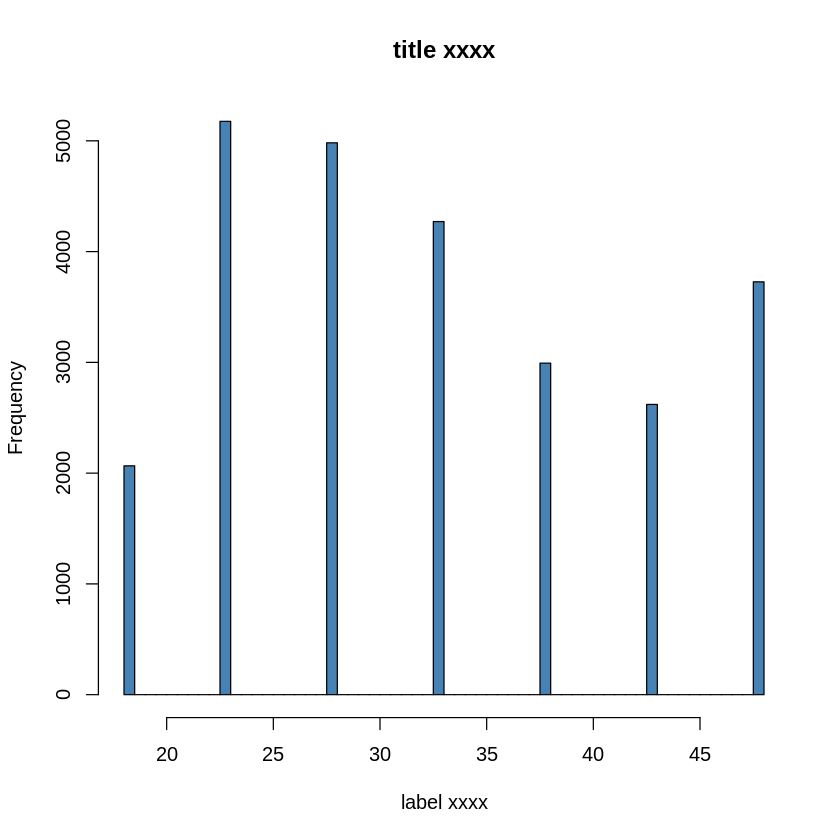

In [136]:
hist(NIJ$Age_at_Release,
  breaks=100,
  col='steelblue',
  main='title xxxx',
  xlab = 'label xxxx')

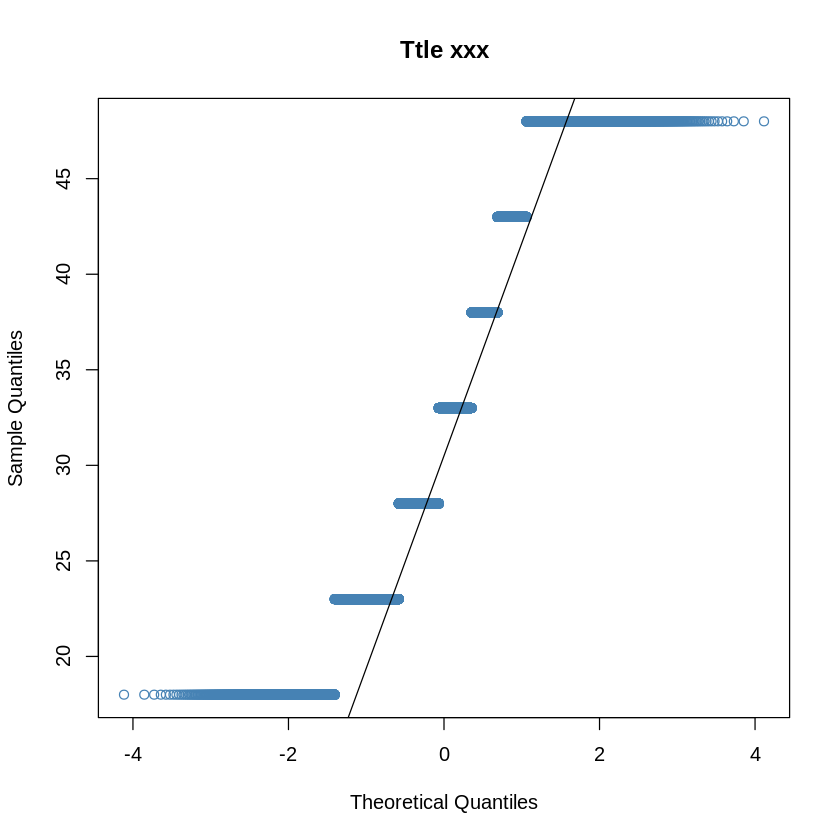

In [137]:
qqnorm(NIJ$Age_at_Release,
  col='steelblue',
  main='Ttle xxx',)
qqline(NIJ$Age_at_Release)